In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
data=pd.read_csv("C:/Users/SD.HEUNAMBIAFENG/Downloads/valeursfoncieres-2020.txt", sep="|", header=0)

C:\Users\SD.HEUNAMBIAFENG\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (14,18,23,24,26,28,31,33,41) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
pd.set_option('display.max_row',111)
pd.set_option('display.max_columns',200)

In [5]:
data.columns.size

43

In [6]:
data

,Code service CH,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Prefixe de section,Section,No plan,No Volume,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,07/01/2020,Vente,"8000,00",NaN,NaN,NaN,B063,FORTUNAT,1250.0,CEYZERIAT,1,72,NaN,AK,216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1061.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,02/01/2020,Vente,"2175,00",NaN,NaN,NaN,B124,TERRES DES CINQ SAULES,1290.0,LAIZ,1,203,NaN,B,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,BT,NaN,85.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,02/01/2020,Vente,"2175,00",NaN,NaN,NaN,B006,BOIS DU CHAMP RION,1290.0,LAIZ,1,203,NaN,B,173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1115.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,02/01/2020,Vente,"2175,00",NaN,NaN,NaN,B025,EN COROBERT,1290.0,LAIZ,1,203,NaN,B,477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1940.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,02/01/2020,Vente,"2175,00",NaN,NaN,NaN,B124,TERRES DES CINQ SAULES,1290.0,LAIZ,1,203,NaN,C,68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1148.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2459555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,16/12/2020,Vente,"1937500,00",24.0,NaN,RUE,1748,CHANOINESSE,75004.0,PARIS 04,75,104,NaN,AW,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2.0,Appartement,NaN,87.0,4.0,S,NaN,447.0
2459556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,16/12/2020,Vente,"1937500,00",24.0,NaN,RUE,1748,CHANOINESSE,75004.0,PARIS 04,75,104,NaN,AW,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3.0,Dépendance,NaN,0.0,0.0,S,NaN,447.0
2459557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,16/12/2020,Vente,"1937500,00",24.0,NaN,RUE,1748,CHANOINESSE,75004.0,PARIS 04,75,104,NaN,AW,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2.0,Appartement,NaN,82.0,2.0,S,NaN,447.0
2459558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,16/12/2020,Vente,"1937500,00",24.0,NaN,RUE,1748,CHANOINESSE,75004.0,PARIS 04,75,104,NaN,AW,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3.0,Dépendance,NaN,0.0,0.0,S,NaN,447.0


In [7]:
df=data.copy()

Exploratory Data Analysis
Analyse de la forme
Target:
Valeur fonciere


Nombre de lignes:
2459560

Nombre de colonnes:
43

Types de variables:
quantitatives: 21 qualitatives: 21

In [8]:
df.shape

(2459560, 43)

In [9]:
df.dtypes.unique()

array([dtype('float64'), dtype('int64'), dtype('O')], dtype=object)

In [10]:
df.select_dtypes('float64').columns.size

17

In [11]:
df.select_dtypes('int64').columns.size

4

In [12]:
df.select_dtypes('O').columns.size

22

In [ ]:
plt.figure(figsize=(40,20))

sns.heatmap(df.isna(), cbar=False)

## Taux de Nan par colonne

In [13]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

Nombre de lots                0.000000
No plan                       0.000000
Code commune                  0.000000
Code departement              0.000000
Commune                       0.000000
No disposition                0.000000
Date mutation                 0.000000
Nature mutation               0.000000
Section                       0.000041
Code voie                     0.012583
Code postal                   0.012601
Voie                          0.012654
Valeur fonciere               0.012910
Nature culture                0.312119
Surface terrain               0.312119
No voie                       0.402651
Type de voie                  0.413873
Type local                    0.465012
Code type local               0.465012
Nombre pieces principales     0.465648
Surface reelle bati           0.465648
1er lot                       0.692226
Surface Carrez du 1er lot     0.914912
2eme lot                      0.936679
Prefixe de section            0.955681
Nature culture speciale  

## Traitement de la cible

In [14]:
df['Valeur fonciere']=df['Valeur fonciere'].map(lambda x: float(str(x).split(sep=",")[0]))

In [15]:
df[df['Valeur fonciere'].isna()]['Nature mutation'].unique()

array(['Vente', 'Echange', 'Expropriation',
       "Vente en l'état futur d'achèvement", 'Vente terrain à bâtir',
       'Adjudication'], dtype=object)

In [16]:
df[(df['Nature mutation']== 'Expropriation') & (df['Valeur fonciere'].isna())].size

19221

### Observation du pourcentage de valeurs foncieres nulles par nature de mutation

In [17]:
df[(df['Nature mutation']== "Vente en l'état futur d'achèvement")]['Valeur fonciere'].isna().describe()

count     181174
unique         2
top        False
freq      181115
Name: Valeur fonciere, dtype: object

In [18]:
df['Nombre de lots'].unique()

array([  0,   2,   1,   3,   6,   5,   4,  15,   9,   7,  13,  11,  42,
         8,  12,  46,  26,  20,  10,  14, 107, 108,  21,  38,  19,  25,
        27,  16,  23,  43,  35,  17, 142,  24,  18,  28,  22,  30,  49,
        62,  40,  31,  50,  44,  34,  53,  51,  54,  37, 119,  93,  66,
        47,  36, 121,  32,  33,  90,  79,  61, 150,  80, 122,  55],
      dtype=int64)

In [19]:
df[(df["Surface terrain"].isna()==False)][["Surface reelle bati","Surface terrain", "Surface Carrez du 1er lot","Surface Carrez du 2eme lot", "Surface Carrez du 3eme lot","Surface Carrez du 4eme lot","Surface Carrez du 5eme lot"]]

,Surface reelle bati,Surface terrain,Surface Carrez du 1er lot,Surface Carrez du 2eme lot,Surface Carrez du 3eme lot,Surface Carrez du 4eme lot,Surface Carrez du 5eme lot
0,NaN,1061.0,NaN,NaN,NaN,NaN,NaN
1,NaN,85.0,NaN,NaN,NaN,NaN,NaN
2,NaN,1115.0,NaN,NaN,NaN,NaN,NaN
3,NaN,1940.0,NaN,NaN,NaN,NaN,NaN
4,NaN,1148.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2459554,27.0,447.0,NaN,NaN,NaN,NaN,NaN
2459555,87.0,447.0,NaN,NaN,NaN,NaN,NaN
2459556,0.0,447.0,NaN,NaN,NaN,NaN,NaN
2459557,82.0,447.0,NaN,NaN,NaN,NaN,NaN


In [20]:
df["Surface terrain"].isna().describe()

count     2459560
unique          2
top         False
freq      1691885
Name: Surface terrain, dtype: object

In [21]:
import shapefile

In [22]:
data_geo_shp=shapefile.Reader("C:/Users/SD.HEUNAMBIAFENG/Downloads/cadastre-75-parcelles-shp/parcelles.shp")

In [23]:
data_geo_prj=shapefile.Reader("C:/Users/SD.HEUNAMBIAFENG/Downloads/cadastre-75-parcelles-shp/parcelles.prj")

In [24]:
data_geo_shp_rec=data_geo_shp.shapeRecords()

In [25]:
data_geo_shp_rec[0].shape.points

[(650234.002498897, 6862851.438287678),
 (650234.2791882373, 6862852.047509729),
 (650233.9401427881, 6862853.573860253),
 (650231.3118064834, 6862865.316904626),
 (650230.9727626524, 6862866.843255492),
 (650230.5709981532, 6862867.046867041),
 (650232.2019779927, 6862870.724689496),
 (650231.6394889163, 6862871.007521732),
 (650287.167182263, 6862977.5050188145),
 (650287.8172176641, 6862977.165840372),
 (650288.5114828765, 6862978.561001522),
 (650289.4880437208, 6862980.365179981),
 (650288.3923298983, 6862980.919462877),
 (650294.9332776567, 6862993.373327287),
 (650388.3574574998, 6862947.325183289),
 (650446.240667786, 6862918.807359269),
 (650567.5829730285, 6862859.0015006885),
 (650567.1201653692, 6862858.071371834),
 (650497.6480209865, 6862717.930246055),
 (650487.3916250899, 6862723.133084894),
 (650234.002498897, 6862851.438287678),
 (650350.1493749963, 6862820.695679087),
 (650351.2563745163, 6862823.165946468),
 (650352.2781912617, 6862822.545589935),
 (650353.367277215

In [26]:
print ('number of shapes imported:',len(data_geo_shp.shapes()))

number of shapes imported: 77720


In [27]:
shape_ex = data_geo_shp.shape(0)

In [28]:
shape_ex

In [29]:
x_lon = np.zeros((len(shape_ex.points),1))
y_lat = np.zeros((len(shape_ex.points),1))
for ip in range(len(shape_ex.points)):
    x_lon[ip] = shape_ex.points[ip][0]
    y_lat[ip] = shape_ex.points[ip][1]

(650230.5709981532, 650567.5829730285)

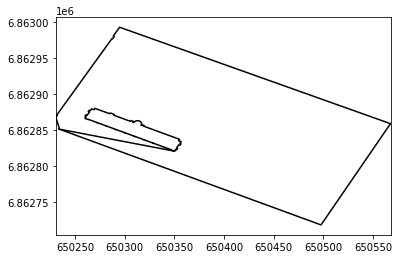

In [30]:
plt.plot(x_lon,y_lat,'k')

# use bbox (bounding box) to set plot limits
plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])

In [31]:
shape_ex.bbox

[650230.5709981532, 6862717.930246055, 650567.5829730285, 6862993.373327287]

In [32]:
fields = data_geo_shp.fields

In [33]:
fields

[('DeletionFlag', 'C', 1, 0),
 ['id', 'C', 14, 0],
 ['commune', 'C', 5, 0],
 ['prefixe', 'C', 3, 0],
 ['section', 'C', 2, 0],
 ['numero', 'C', 4, 0],
 ['contenance', 'N', 12, 0],
 ['created', 'D', 8, 0],
 ['updated', 'D', 8, 0]]

In [34]:
rec = data_geo_shp.record(1000)
rec

Record #1000: ['75120000AA0030', '75120', '000', 'AA', '30', 499, datetime.date(2007, 9, 19), datetime.date(2016, 7, 26)]

In [35]:
data_geo_shp.record(1001)

Record #1001: ['75101000AR0108', '75101', '000', 'AR', '108', 12, datetime.date(2006, 10, 10), datetime.date(2016, 7, 21)]

In [36]:
shape_ex.bbox

[650230.5709981532, 6862717.930246055, 650567.5829730285, 6862993.373327287]

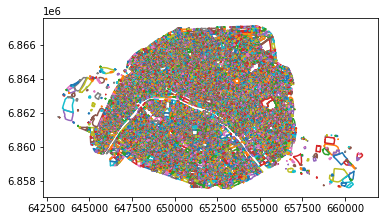

In [37]:
plt.figure()
ax = plt.axes() # add the axes
ax.set_aspect('equal')

for shape in list(data_geo_shp.iterShapes()):
    npoints=len(shape.points) # total points
    nparts = len(shape.parts) # total parts

    if nparts == 1:
        x_lon = np.zeros((len(shape.points),1))
        y_lat = np.zeros((len(shape.points),1))
        for ip in range(len(shape.points)):
            x_lon[ip] = shape.points[ip][0]
            y_lat[ip] = shape.points[ip][1]
        plt.plot(x_lon,y_lat)

    else: # loop over parts of each shape, plot separately
        for ip in range(nparts): # loop over parts, plot separately
            i0=shape.parts[ip]
            if ip < nparts-1:
                i1 = shape.parts[ip+1]-1
            else:
                i1 = npoints

            seg=shape.points[i0:i1+1]
            x_lon = np.zeros((len(seg),1))
            y_lat = np.zeros((len(seg),1))
            for ip in range(len(seg)):
                x_lon[ip] = seg[ip][0]
                y_lat[ip] = seg[ip][1]

            plt.plot(x_lon,y_lat)
plt.show()

In [38]:
shapeRecs = data_geo_shp.shapeRecords()

In [39]:
shapeRecs[0].shape.points

[(650234.002498897, 6862851.438287678),
 (650234.2791882373, 6862852.047509729),
 (650233.9401427881, 6862853.573860253),
 (650231.3118064834, 6862865.316904626),
 (650230.9727626524, 6862866.843255492),
 (650230.5709981532, 6862867.046867041),
 (650232.2019779927, 6862870.724689496),
 (650231.6394889163, 6862871.007521732),
 (650287.167182263, 6862977.5050188145),
 (650287.8172176641, 6862977.165840372),
 (650288.5114828765, 6862978.561001522),
 (650289.4880437208, 6862980.365179981),
 (650288.3923298983, 6862980.919462877),
 (650294.9332776567, 6862993.373327287),
 (650388.3574574998, 6862947.325183289),
 (650446.240667786, 6862918.807359269),
 (650567.5829730285, 6862859.0015006885),
 (650567.1201653692, 6862858.071371834),
 (650497.6480209865, 6862717.930246055),
 (650487.3916250899, 6862723.133084894),
 (650234.002498897, 6862851.438287678),
 (650350.1493749963, 6862820.695679087),
 (650351.2563745163, 6862823.165946468),
 (650352.2781912617, 6862822.545589935),
 (650353.367277215

In [40]:
shapeRecs[0].shape.bbox

[650230.5709981532, 6862717.930246055, 650567.5829730285, 6862993.373327287]

In [41]:
shapeRecs[1].shape.bbox

[650259.9634964054, 6862820.695679087, 650356.8806280041, 6862880.351687222]

In [42]:
shapeRecs[0].record

Record #-1: ['75101000AB0002', '75101', '000', 'AB', '2', 45688, datetime.date(2006, 10, 6), datetime.date(2016, 7, 21)]

In [43]:
shapeRecs[1].record

Record #-1: ['75101000AB0001', '75101', '000', 'AB', '1', 1731, datetime.date(2006, 10, 6), datetime.date(2016, 7, 21)]

In [44]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

In [45]:
shapefile_df = read_shapefile(data_geo_shp)

In [46]:
shapefile_df

,id,commune,prefixe,section,numero,contenance,created,updated,coords
0,75101000AB0002,75101,000,AB,2,45688.0,2006-10-06,2016-07-21,"[(650234.002498897, 6862851.438287678), (65023..."
1,75101000AB0001,75101,000,AB,1,1731.0,2006-10-06,2016-07-21,"[(650350.1493749963, 6862820.695679087), (6503..."
2,75101000AC0002,75101,000,AC,2,49342.0,2006-10-06,2016-07-21,"[(650388.3574574998, 6862947.325183289), (6502..."
3,75101000AC0001,75101,000,AC,1,993.0,2006-10-06,2016-07-21,"[(650448.4376878919, 6863052.995753481), (6504..."
4,75101000AD0001,75101,000,AD,1,64760.0,2006-10-06,2016-07-21,"[(650915.7592440435, 6862686.995086259), (6508..."
...,...,...,...,...,...,...,...,...,...
77715,75120000ED0001,75120,000,ED,1,459.0,2007-09-28,2016-07-26,"[(656897.9509424589, 6861156.848863987), (6569..."
77716,75120000ED0026,75120,000,ED,26,160.0,2012-12-17,2016-07-26,"[(656946.2766541241, 6861107.562781846), (6569..."
77717,75120000ED0019,75120,000,ED,19,34.0,2012-08-03,2016-07-26,"[(657119.6895101306, 6861083.659383055), (6571..."
77718,75120000ED0018,75120,000,ED,18,75.0,2012-08-03,2016-07-26,"[(657138.7334787633, 6861087.621664294), (6571..."


In [47]:
df

,Code service CH,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Prefixe de section,Section,No plan,No Volume,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,07/01/2020,Vente,8000.0,NaN,NaN,NaN,B063,FORTUNAT,1250.0,CEYZERIAT,1,72,NaN,AK,216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1061.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,02/01/2020,Vente,2175.0,NaN,NaN,NaN,B124,TERRES DES CINQ SAULES,1290.0,LAIZ,1,203,NaN,B,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,BT,NaN,85.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,02/01/2020,Vente,2175.0,NaN,NaN,NaN,B006,BOIS DU CHAMP RION,1290.0,LAIZ,1,203,NaN,B,173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1115.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,02/01/2020,Vente,2175.0,NaN,NaN,NaN,B025,EN COROBERT,1290.0,LAIZ,1,203,NaN,B,477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1940.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,02/01/2020,Vente,2175.0,NaN,NaN,NaN,B124,TERRES DES CINQ SAULES,1290.0,LAIZ,1,203,NaN,C,68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1148.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2459555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,16/12/2020,Vente,1937500.0,24.0,NaN,RUE,1748,CHANOINESSE,75004.0,PARIS 04,75,104,NaN,AW,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2.0,Appartement,NaN,87.0,4.0,S,NaN,447.0
2459556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,16/12/2020,Vente,1937500.0,24.0,NaN,RUE,1748,CHANOINESSE,75004.0,PARIS 04,75,104,NaN,AW,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3.0,Dépendance,NaN,0.0,0.0,S,NaN,447.0
2459557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,16/12/2020,Vente,1937500.0,24.0,NaN,RUE,1748,CHANOINESSE,75004.0,PARIS 04,75,104,NaN,AW,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2.0,Appartement,NaN,82.0,2.0,S,NaN,447.0
2459558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,16/12/2020,Vente,1937500.0,24.0,NaN,RUE,1748,CHANOINESSE,75004.0,PARIS 04,75,104,NaN,AW,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3.0,Dépendance,NaN,0.0,0.0,S,NaN,447.0


In [48]:
Join=[]
for col in df.columns:
    if (col in shapefile_df.columns):
        Join.append(col)

In [49]:
Join

[]

In [50]:
df.iloc[0,:]

Code service CH                      NaN
Reference document                   NaN
1 Articles CGI                       NaN
2 Articles CGI                       NaN
3 Articles CGI                       NaN
4 Articles CGI                       NaN
5 Articles CGI                       NaN
No disposition                         1
Date mutation                 07/01/2020
Nature mutation                    Vente
Valeur fonciere                   8000.0
No voie                              NaN
B/T/Q                                NaN
Type de voie                         NaN
Code voie                           B063
Voie                            FORTUNAT
Code postal                       1250.0
Commune                        CEYZERIAT
Code departement                       1
Code commune                          72
Prefixe de section                   NaN
Section                               AK
No plan                              216
No Volume                            NaN
1er lot         

## Traitement de la clé de jointure

Ell est constituée de la concatenation de:
"Code departement", "Code commune","prefixe" "section" "numero"

In [52]:
pd.set_option('display.max_row',111)
pd.set_option('display.max_columns',200)

In [ ]:
df["Code postal"]

## Traitement codepostal

In [53]:
df['Code postal']=df['Code postal'].map(lambda x: str(x).split(sep=".")[0])

## Code departement - Commune

In [ ]:
df['Code commune']

In [55]:
df["Prefixe de section"].isna().describe()

count     2459560
unique          2
top          True
freq      2350554
Name: Prefixe de section, dtype: object

In [56]:
df[["Code postal","Section","No plan"]].isna().describe()

,Code postal,Section,No plan
count,2459560,2459560,2459560
unique,1,2,1
top,False,False,False
freq,2459560,2459459,2459560


In [ ]:
df["Code postal"] df["Prefixe de section"] df["Section"] df["No plan"]

In [57]:
df["Code departement"]= df["Code departement"].map(str)

In [58]:
df[df["Code departement"]=='75']

,Code service CH,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Prefixe de section,Section,No plan,No Volume,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
2405430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,02/01/2020,Vente,268800.0,14.0,NaN,RUE,0411,DE L ARCADE,75008,PARIS 08,75,108,NaN,BS,136,NaN,31,NaN,8.0,"22,72",NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,NaN,24.0,1.0,NaN,NaN,NaN
2405431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,06/01/2020,Vente,878378.0,9.0,NaN,BD,5888,DE LA MADELEINE,75001,PARIS 01,75,101,NaN,BC,41,NaN,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,4.0,Local industriel. commercial ou assimilé,NaN,43.0,0.0,NaN,NaN,NaN
2405432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,06/01/2020,Vente,878378.0,9.0,NaN,BD,5888,DE LA MADELEINE,75001,PARIS 01,75,101,NaN,BC,41,NaN,14,"66,64",15.0,NaN,40.0,NaN,NaN,NaN,NaN,NaN,3,2.0,Appartement,NaN,66.0,2.0,NaN,NaN,NaN
2405433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,10/01/2020,Vente,680000.0,10.0,NaN,RUE,1200,DU BOURG L ABBE,75003,PARIS 03,75,103,NaN,AV,6,NaN,9,"50,74",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,NaN,51.0,2.0,NaN,NaN,NaN
2405434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2020,Vente,852000.0,24.0,NaN,RUE,8716,DE SAINTONGE,75003,PARIS 03,75,103,NaN,AK,80,NaN,15,NaN,74.0,"66,00",NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,NaN,12.0,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2459555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,16/12/2020,Vente,1937500.0,24.0,NaN,RUE,1748,CHANOINESSE,75004,PARIS 04,75,104,NaN,AW,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2.0,Appartement,NaN,87.0,4.0,S,NaN,447.0
2459556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,16/12/2020,Vente,1937500.0,24.0,NaN,RUE,1748,CHANOINESSE,75004,PARIS 04,75,104,NaN,AW,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3.0,Dépendance,NaN,0.0,0.0,S,NaN,447.0
2459557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,16/12/2020,Vente,1937500.0,24.0,NaN,RUE,1748,CHANOINESSE,75004,PARIS 04,75,104,NaN,AW,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2.0,Appartement,NaN,82.0,2.0,S,NaN,447.0
2459558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,16/12/2020,Vente,1937500.0,24.0,NaN,RUE,1748,CHANOINESSE,75004,PARIS 04,75,104,NaN,AW,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3.0,Dépendance,NaN,0.0,0.0,S,NaN,447.0


In [66]:
df["Nature mutation"]=df["Nature mutation"].map(str)

In [60]:
df["Type local"]=df["Type local"].map(str)

## Filtre sur le type de mutation, le type de local et le departement et sur le nombre de lots

In [117]:
nombre_de_lot=2

In [118]:
df_no_Na=df[(df["Valeur fonciere"].isna()==False) & (df["Code departement"]=="75") & (df["Nature mutation"]=="Vente") & (df["Type local"]=="Appartement") & (df["Nombre de lots"]<nombre_de_lot) ].copy()

In [119]:
df_no_Na['Arrondissement']=df['Code departement']+df['Code commune'].map(str)

In [120]:
df_no_Na

,Code service CH,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Prefixe de section,Section,No plan,No Volume,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,Arrondissement
2405433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,10/01/2020,Vente,680000.0,10.0,NaN,RUE,1200,DU BOURG L ABBE,75003,PARIS 03,75,103,NaN,AV,6,NaN,9,"50,74",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,NaN,51.0,2.0,nan,NaN,NaN,75103
2405435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2020,Vente,852000.0,24.0,NaN,RUE,8716,DE SAINTONGE,75003,PARIS 03,75,103,NaN,AK,80,NaN,74,"66,00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,NaN,19.0,1.0,nan,NaN,NaN,75103
2405436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2020,Vente,852000.0,24.0,NaN,RUE,8716,DE SAINTONGE,75003,PARIS 03,75,103,NaN,AK,80,NaN,74,"66,00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,NaN,12.0,1.0,nan,NaN,NaN,75103
2405437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,08/01/2020,Vente,6000.0,7.0,NaN,AV,3824,FRANKLIN D ROOSEVELT,75008,PARIS 08,75,108,NaN,AL,13,NaN,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,NaN,79.0,3.0,nan,NaN,NaN,75108
2405438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2020,Vente,2350000.0,83.0,NaN,RUE,6419,DE MONCEAU,75008,PARIS 08,75,108,NaN,CG,26,NaN,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,NaN,174.0,5.0,nan,NaN,NaN,75108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2459552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,16/12/2020,Vente,1937500.0,24.0,NaN,RUE,1748,CHANOINESSE,75004,PARIS 04,75,104,NaN,AW,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2.0,Appartement,NaN,40.0,2.0,S,NaN,447.0,75104
2459553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,16/12/2020,Vente,1937500.0,24.0,NaN,RUE,1748,CHANOINESSE,75004,PARIS 04,75,104,NaN,AW,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2.0,Appartement,NaN,29.0,2.0,S,NaN,447.0,75104
2459554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,16/12/2020,Vente,1937500.0,24.0,NaN,RUE,1748,CHANOINESSE,75004,PARIS 04,75,104,NaN,AW,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2.0,Appartement,NaN,27.0,2.0,S,NaN,447.0,75104
2459555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,16/12/2020,Vente,1937500.0,24.0,NaN,RUE,1748,CHANOINESSE,75004,PARIS 04,75,104,NaN,AW,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2.0,Appartement,NaN,87.0,4.0,S,NaN,447.0,75104


In [121]:
df["Nature mutation"].unique()

array(['Vente', 'Vente terrain à bâtir', 'Echange',
       "Vente en l'état futur d'achèvement", 'Adjudication',
       'Expropriation'], dtype=object)

In [122]:
df_no_Na["Section"].isna().describe()

count     16803
unique        1
top       False
freq      16803
Name: Section, dtype: object

In [123]:
df_no_Na["No plan"].isna().describe()

count     16803
unique        1
top       False
freq      16803
Name: No plan, dtype: object

## Jointure

In [124]:
df_to_join=df_no_Na

In [125]:
df_to_join["Prefixe de section"]=df_to_join["Prefixe de section"].map(lambda x:"000")

In [126]:
df_to_join["jointure"]=df_to_join["Arrondissement"].map(str)+ df_to_join["Prefixe de section"].map(str)+ df_to_join["Section"].map(str)+df_to_join["No plan"].map(str)

In [127]:
df_to_join["Arrondissement"]

2405433    75103
2405435    75103
2405436    75103
2405437    75108
2405438    75108
           ...  
2459552    75104
2459553    75104
2459554    75104
2459555    75104
2459557    75104
Name: Arrondissement, Length: 16803, dtype: object

In [128]:
df_to_join["jointure"]

2405433     75103000AV6
2405435    75103000AK80
2405436    75103000AK80
2405437    75108000AL13
2405438    75108000CG26
               ...     
2459552    75104000AW19
2459553    75104000AW19
2459554    75104000AW19
2459555    75104000AW19
2459557    75104000AW19
Name: jointure, Length: 16803, dtype: object

In [129]:
df_to_join.shape

(16803, 45)

In [130]:
shapefile_df["jointure"]=shapefile_df["commune"].map(str)+"000"+shapefile_df["section"].map(str)+shapefile_df["numero"].map(str)

In [131]:
df_to_join=df_to_join.set_index("jointure")

In [132]:
shapefile_df_to_join=shapefile_df.set_index("jointure")

In [133]:
shapefile_df_to_join.index

Index(['75101000AB2', '75101000AB1', '75101000AC2', '75101000AC1',
       '75101000AD1', '75104000AB64', '75104000AB86', '75104000AB85',
       '75104000AB88', '75104000AB60',
       ...
       '75120000ED15', '75120000ED22', '75120000ED24', '75120000ED25',
       '75120000ED21', '75120000ED1', '75120000ED26', '75120000ED19',
       '75120000ED18', '75120000ED27'],
      dtype='object', name='jointure', length=77720)

In [134]:
data_merged= pd.concat([df_to_join,shapefile_df_to_join],axis=1, join='inner', keys=["jointure"])

In [135]:
data_merged= df_to_join.join(shapefile_df_to_join, how="inner")

In [136]:
data_merged

,Code service CH,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Prefixe de section,Section,No plan,No Volume,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,Arrondissement,id,commune,prefixe,section,numero,contenance,created,updated,coords
jointure,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
75101000AK18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,28/09/2020,Vente,100.0,28.0,NaN,QUAI,5824,DU LOUVRE,75001,PARIS 01,75,101,000,AK,18,NaN,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,NaN,110.0,2.0,nan,NaN,NaN,75101,75101000AK0018,75101,000,AK,18,224.0,2006-10-09,2016-07-21,"[(651622.7919587007, 6862327.400295994), (6516..."
75101000AL10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,23/12/2020,Vente,1220000.0,12.0,NaN,PL,2594,DAUPHINE,75001,PARIS 01,75,101,000,AL,10,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,NaN,51.0,3.0,nan,NaN,NaN,75101,75101000AL0010,75101,000,AL,10,256.0,2006-10-09,2016-07-21,"[(651791.2734951854, 6862074.719433691), (6517..."
75101000AL27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,14/09/2020,Vente,1250000.0,23.0,NaN,PL,2594,DAUPHINE,75001,PARIS 01,75,101,000,AL,27,NaN,1,"62,50",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,NaN,62.0,4.0,nan,NaN,NaN,75101,75101000AL0027,75101,000,AL,27,147.0,2006-10-09,2016-07-21,"[(651703.3420849448, 6862045.939602381), (6517..."
75101000AL28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,26/08/2020,Vente,1200000.0,68.0,NaN,QUAI,6920,DES ORFEVRES,75001,PARIS 01,75,101,000,AL,28,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,NaN,40.0,1.0,nan,NaN,NaN,75101,75101000AL0028,75101,000,AL,28,61.0,2006-10-09,2016-07-21,"[(651693.7920108116, 6862048.120881027), (6516..."
75101000AL3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,15/06/2020,Vente,3100000.0,24.0,NaN,PL,2594,DAUPHINE,75001,PARIS 01,75,101,000,AL,3,NaN,27,"51,00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,NaN,52.0,2.0,nan,NaN,NaN,75101,75101000AL0003,75101,000,AL,3,324.0,2006-10-09,2016-07-21,"[(651720.5072086777, 6862089.375383045), (6517..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75120000EC22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,20/10/2020,Vente,834250.0,11.0,NaN,BD,2608,DAVOUT,75020,PARIS 20,75,120,000,EC,22,NaN,85,"92,75",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,NaN,94.0,5.0,nan,NaN,NaN,75120,75120000EC0022,75120,000,EC,22,2927.0,2007-09-28,2014-11-04,"[(656703.2464831937, 6861090.670229163), (6567..."
75120000EC25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,14/01/2020,Vente,250000.0,19.0,NaN,BD,2608,DAVOUT,75020,PARIS 20,75,120,000,EC,25,NaN,28,"28,52",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,NaN,28.0,1.0,nan,NaN,NaN,75120,75120000EC0025,75120,000,EC,25,681.0,2007-09-28,2014-11-04,"[(656756.5509782564, 6861110.776964385), (6567..."
75120000EC27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,20/11/2020,Vente,320800.0,25.0,NaN,BD,2608,DAVOUT,75020,PARIS 20,75,120,000,EC,27,NaN,11,"38,39",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,NaN,33.0,2.0,nan,NaN,NaN,75120,75120000EC0027,75120,000,EC,27,138.0,2007-09-28,2014-11-04,"[(656772.9612026982, 6861158.113540209), (6567..."


In [137]:
data_merged.columns.size

53

In [138]:
Commun=[]
for index in df_to_join.index:
    if index in shapefile_df_to_join.index:
        Commun.append(index)

In [139]:
len(Commun)

16784

## Traitement du fichier joint

In [140]:
df_joint=data_merged

### Outliers de prix par commune

In [152]:
df_joint["Prix"]=df_joint["Valeur fonciere"]/df_joint["Surface reelle bati"]

In [153]:
df_joint.groupby(["commune"])["Prix"].describe()

,count,mean,std,min,25%,50%,75%,max
commune,,,,,,,,
75101,272.0,245768.305576,8.146453e+05,0.011364,11077.235772,14774.953008,82727.272727,6.560000e+06
75102,420.0,69015.113710,1.569585e+05,0.010000,10461.981567,12788.203125,16364.583333,1.171591e+06
75103,517.0,60286.336705,1.558887e+05,0.007042,11083.673469,13650.793651,25000.000000,1.783333e+06
75104,346.0,37323.846606,9.115281e+04,0.018868,11338.541667,14031.250000,18940.797222,9.708333e+05
75105,479.0,35017.003975,9.525772e+04,0.006369,10563.492063,12962.962963,16054.166667,8.000000e+05
75106,538.0,257496.181125,1.019175e+06,0.043478,13292.998120,17391.483516,53333.333333,1.862827e+07
75107,409.0,49221.186497,1.987836e+05,0.027778,12395.833333,15000.000000,20769.230769,3.333333e+06
75108,538.0,474750.227028,1.587310e+06,0.006061,11445.175439,16989.876761,284455.205811,2.233333e+07
75109,800.0,111907.658575,2.932485e+05,0.009346,10207.270408,12998.461538,65112.745098,4.366707e+06


In [154]:
df_joint.groupby(["commune"])["Prix"]

In [155]:
df_joint.columns.size

55

(0.011363636363636364, 6560000.0)


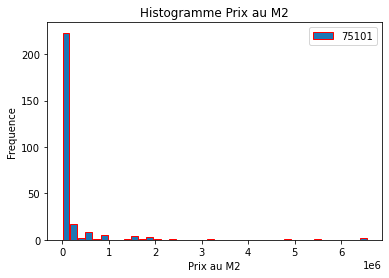

(0.01, 1171590.9090909092)


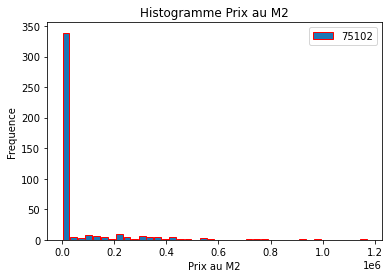

(0.007042253521126761, 1783333.3333333333)


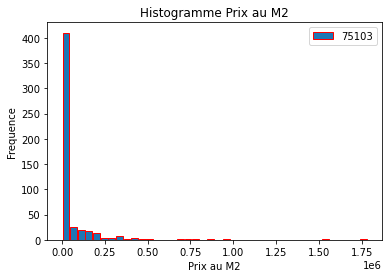

(0.018867924528301886, 970833.3333333334)


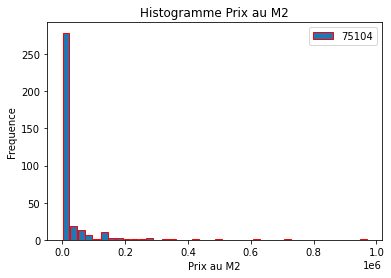

(0.006369426751592357, 800000.0)


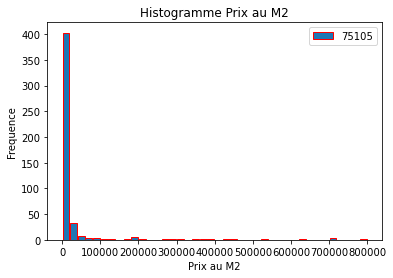

(0.043478260869565216, 18628267.2)


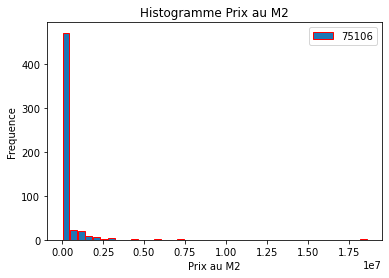

(0.027777777777777776, 3333333.3333333335)


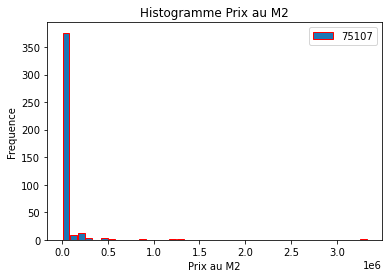

(0.006060606060606061, 22333333.333333332)


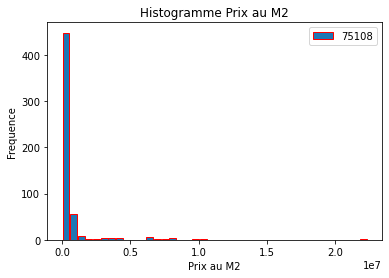

(0.009345794392523364, 4366707.047619048)


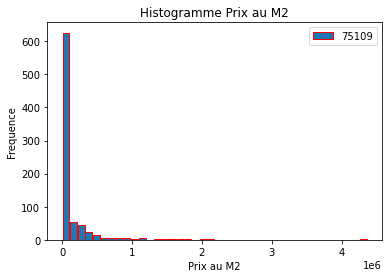

(0.0125, 2300000.0)


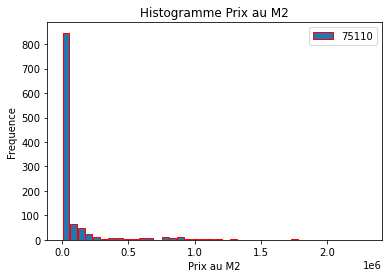

(0.019230769230769232, 1800000.0)


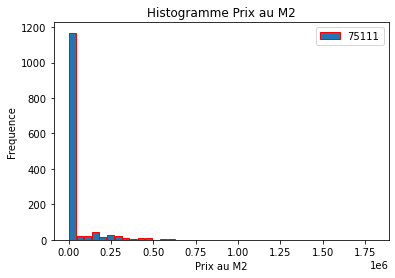

(9.375, 1205555.5555555555)


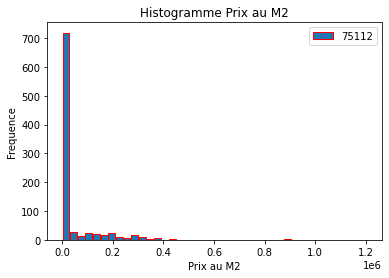

(0.030303030303030304, 683333.3333333334)


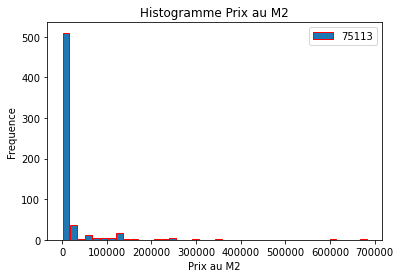

(5.0, 712043.7058823529)


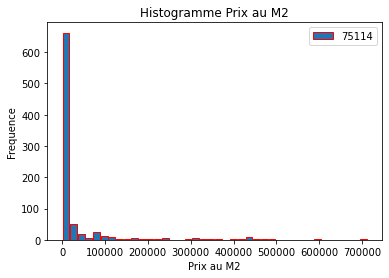

(0.01020408163265306, 631743.75)


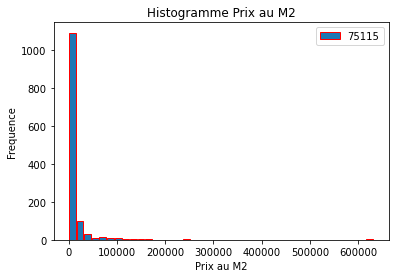

(0.008, 2100000.0)


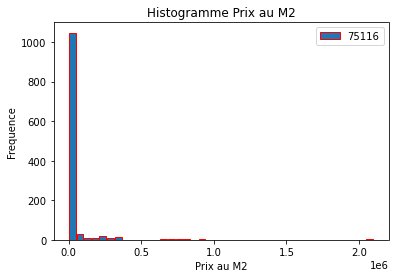

(0.023255813953488372, 1700000.0)


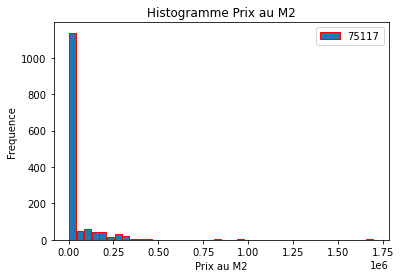

(0.015384615384615385, 1403250.0)


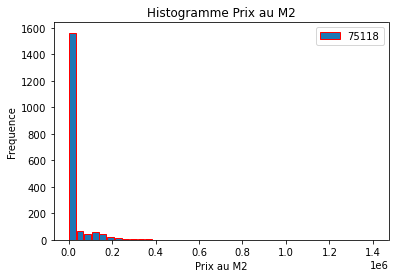

(2.5, 320000.0)


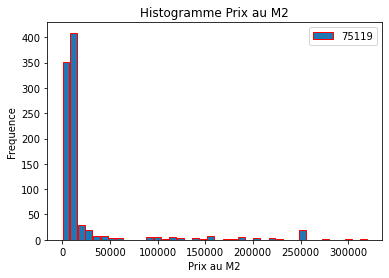

(0.024390243902439025, 1145454.5454545454)


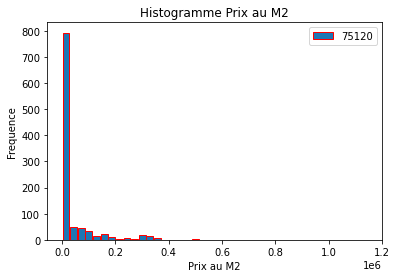

In [231]:

for com in df_joint["commune"].unique():
    range_hist=(df_joint[df_joint["commune"]==com]["Prix"].min(),df_joint[df_joint["commune"]==com]["Prix"].max())
    print(range_hist)
    plt.hist(df_joint[df_joint["commune"]==com]["Prix"].values,range=range_hist,rwidth=0.9,edgecolor="red",bins=40, label=com)
    plt.title("Histogramme Prix au M2")
    plt.xlabel("Prix au M2")
    plt.ylabel("Frequence")
    plt.legend()
    plt.show()

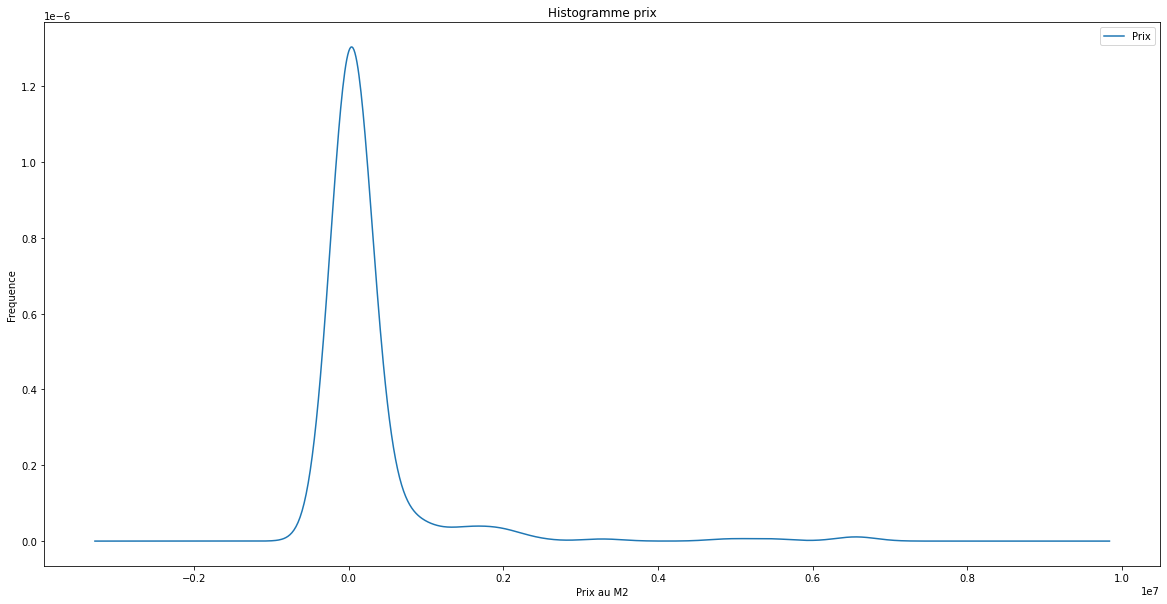

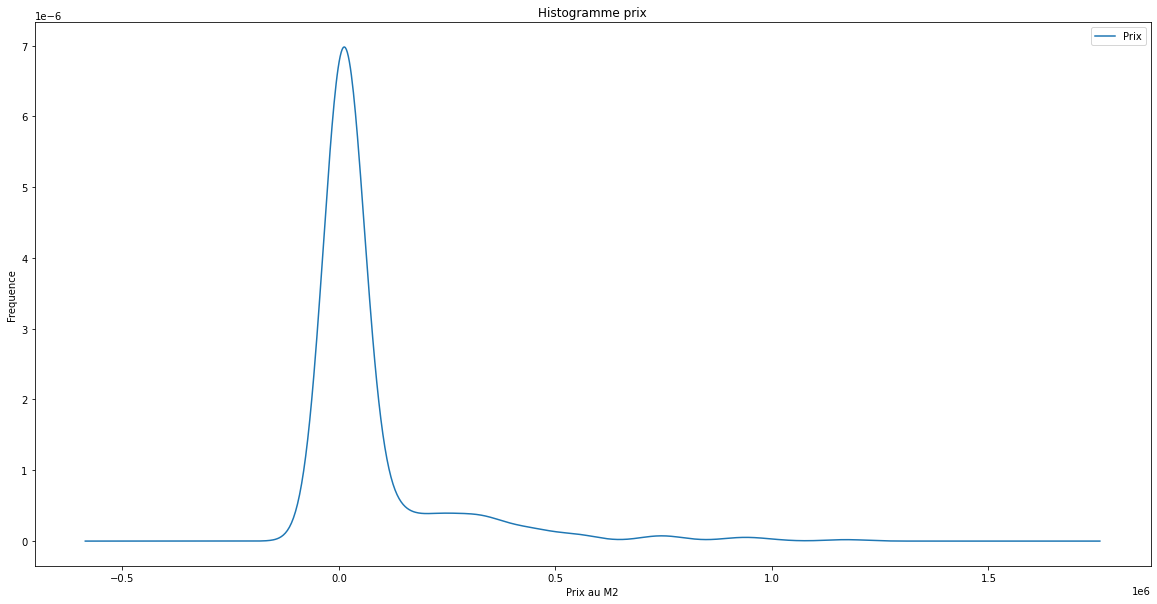

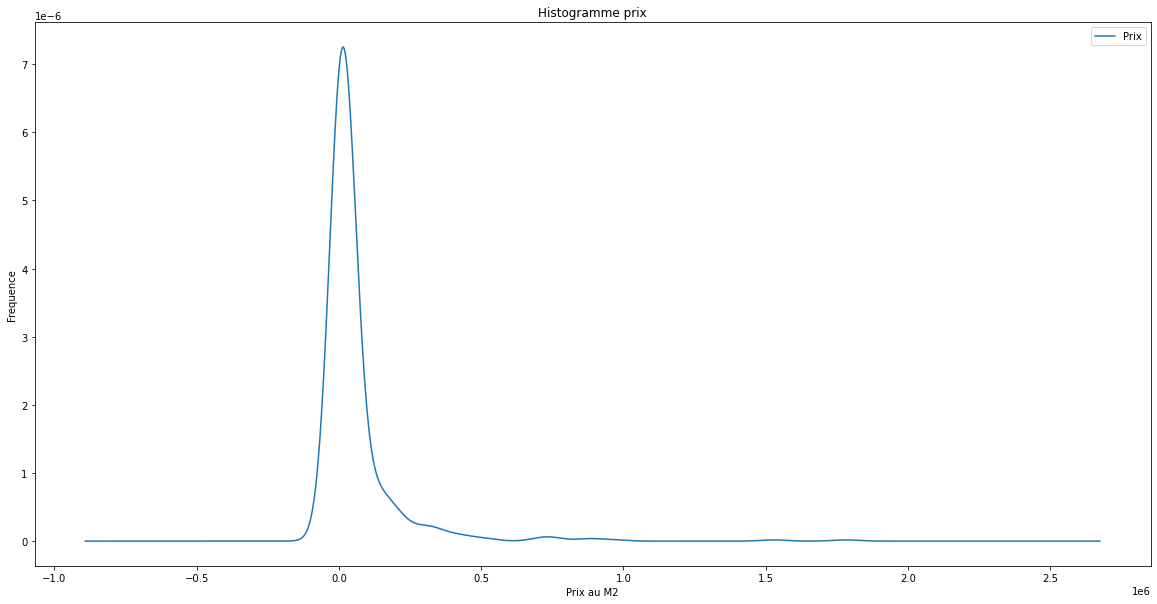

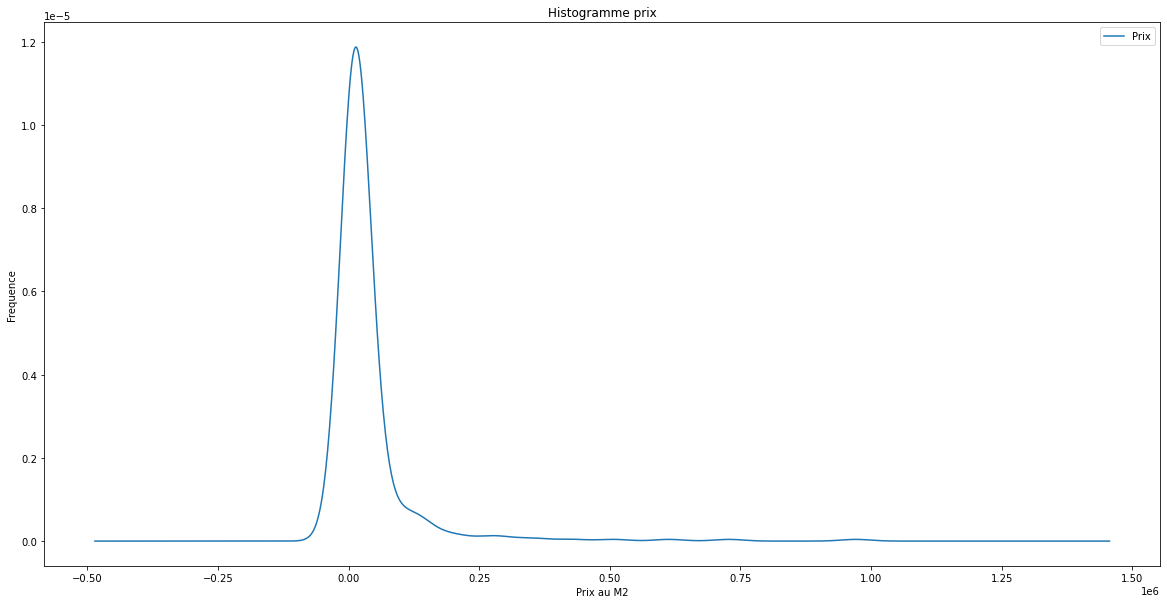

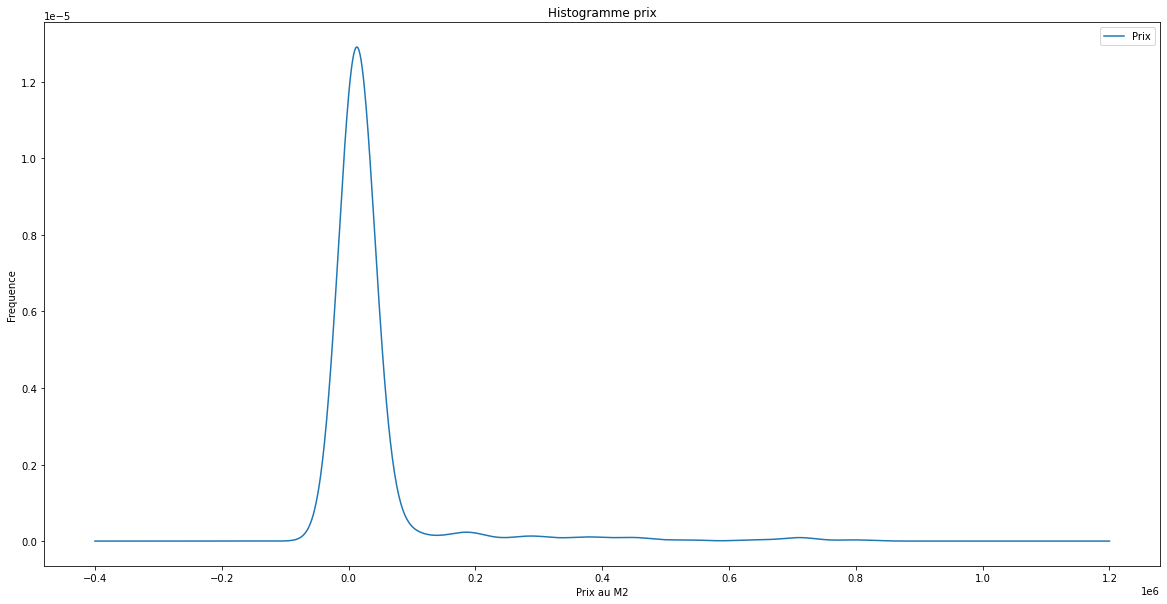

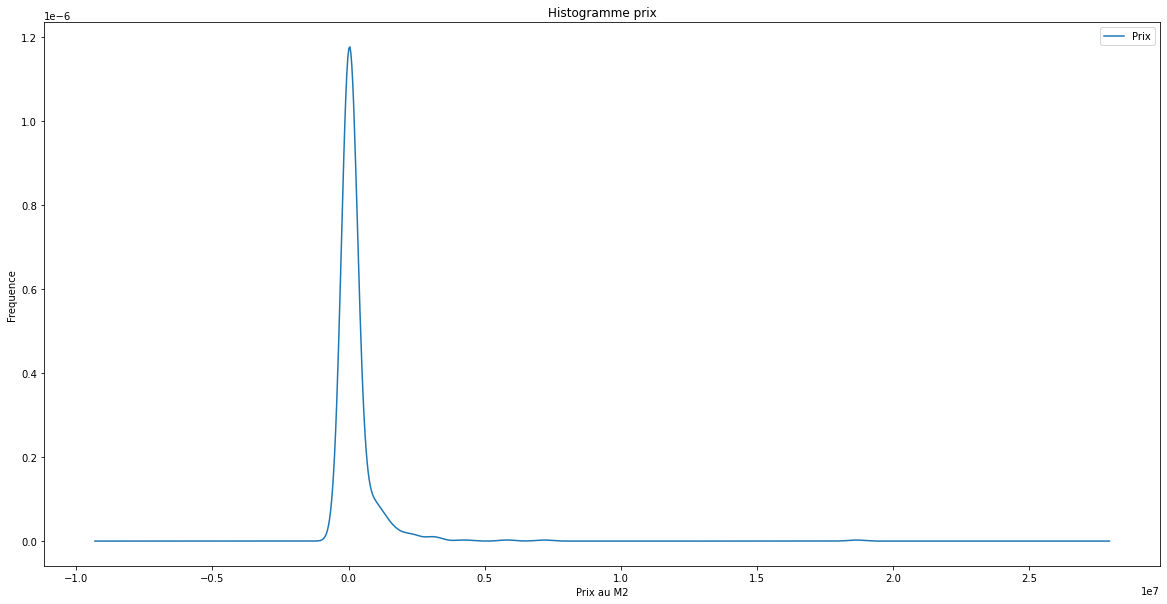

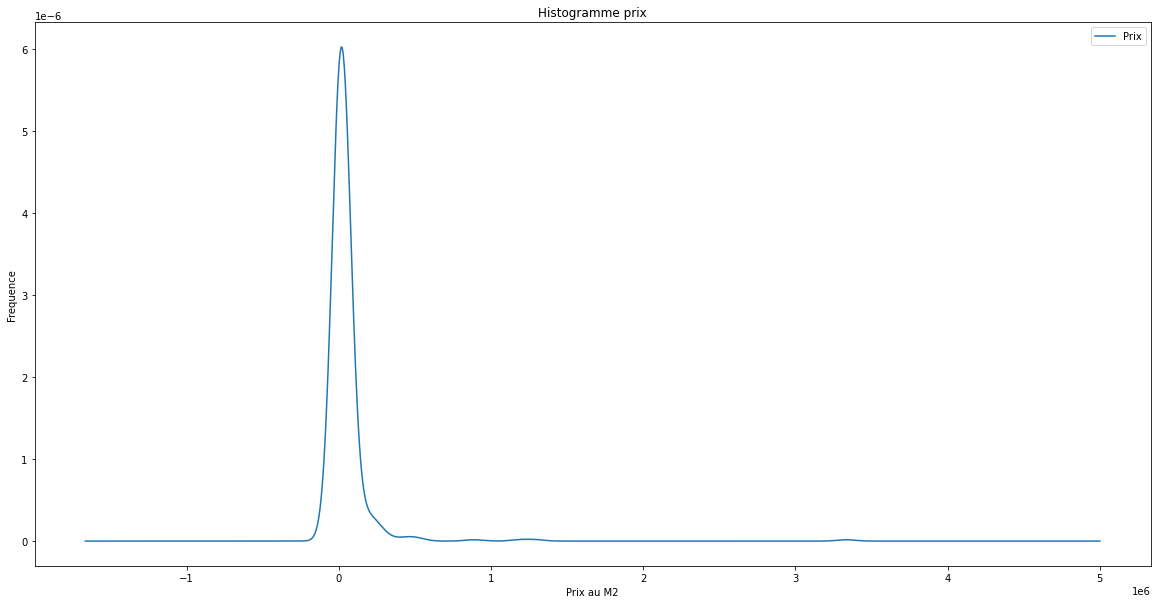

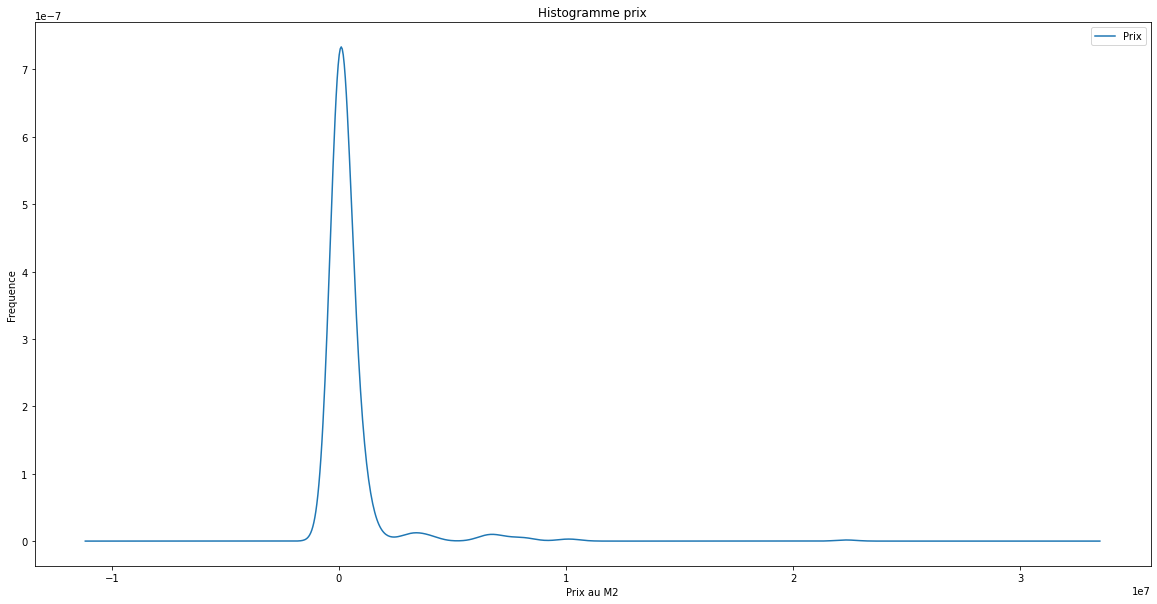

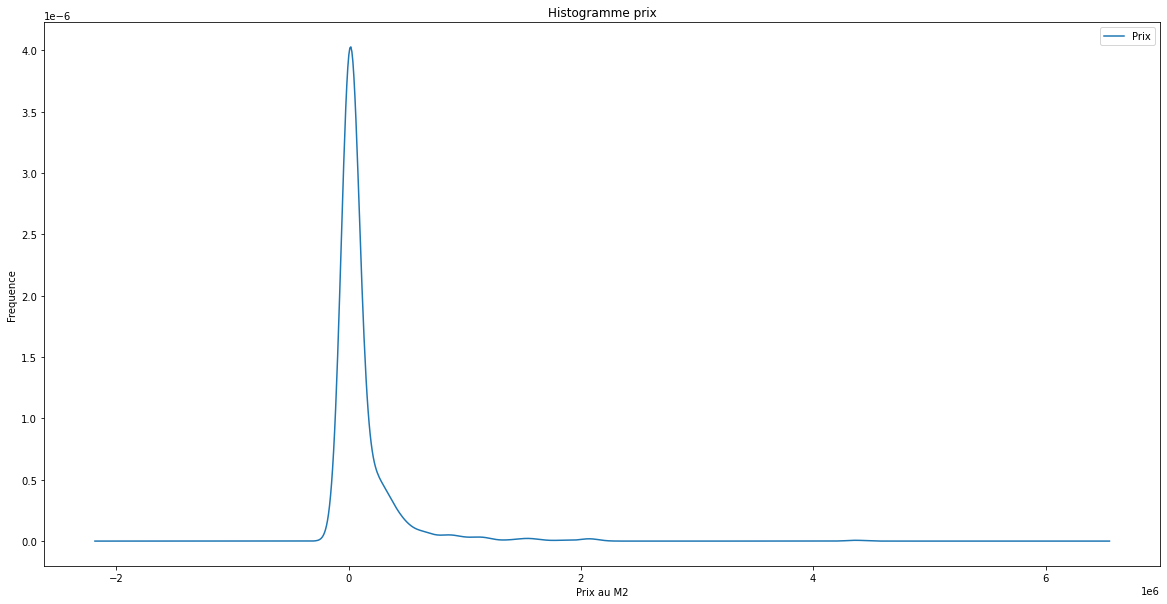

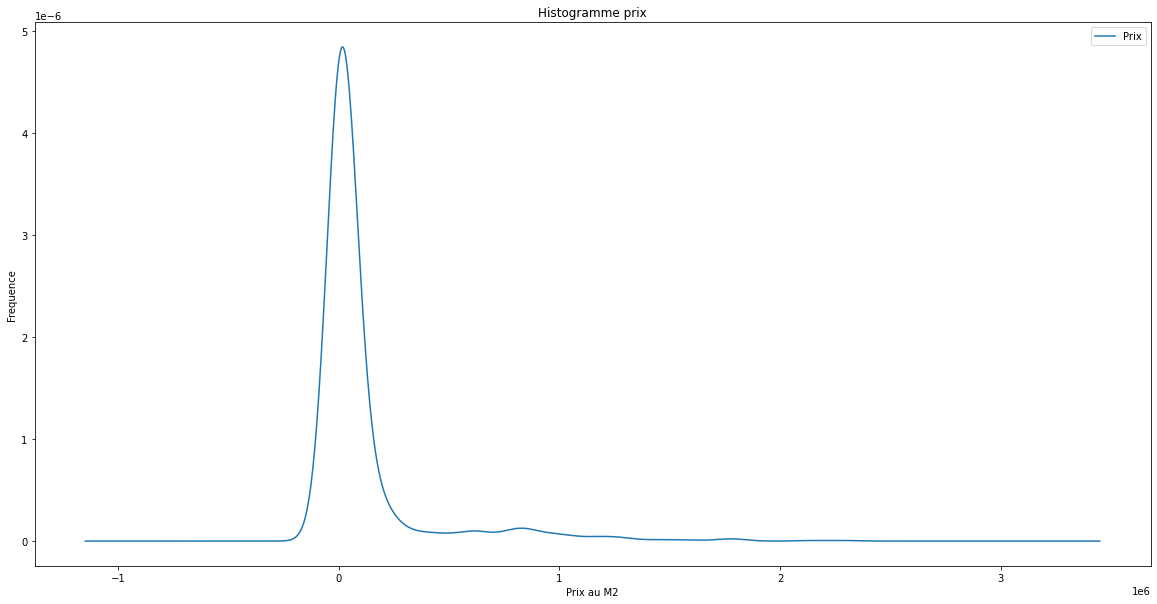

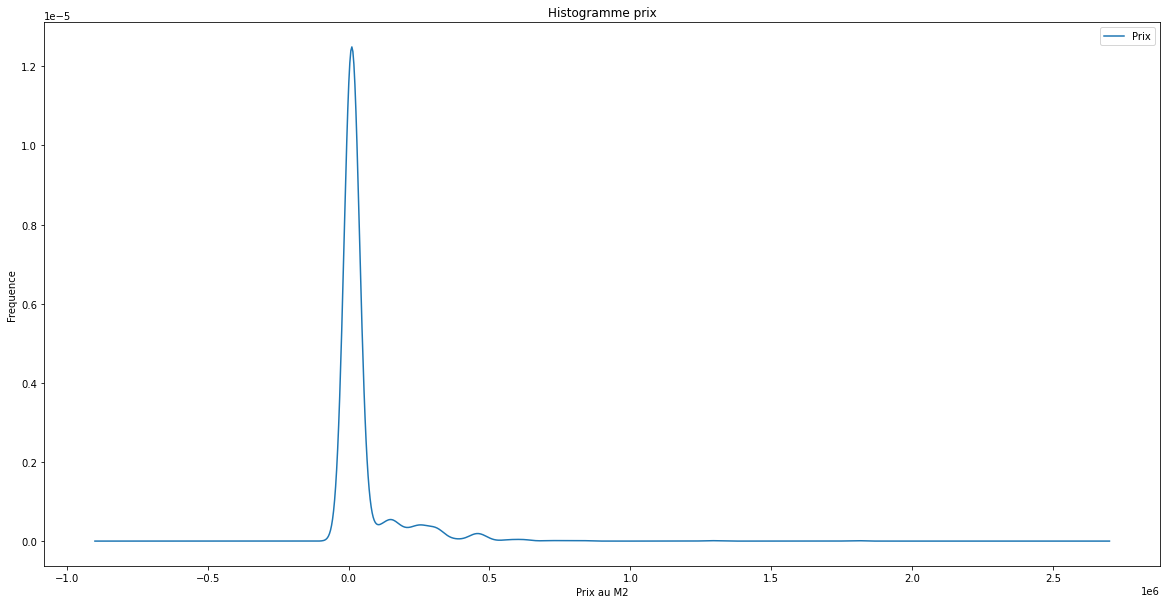

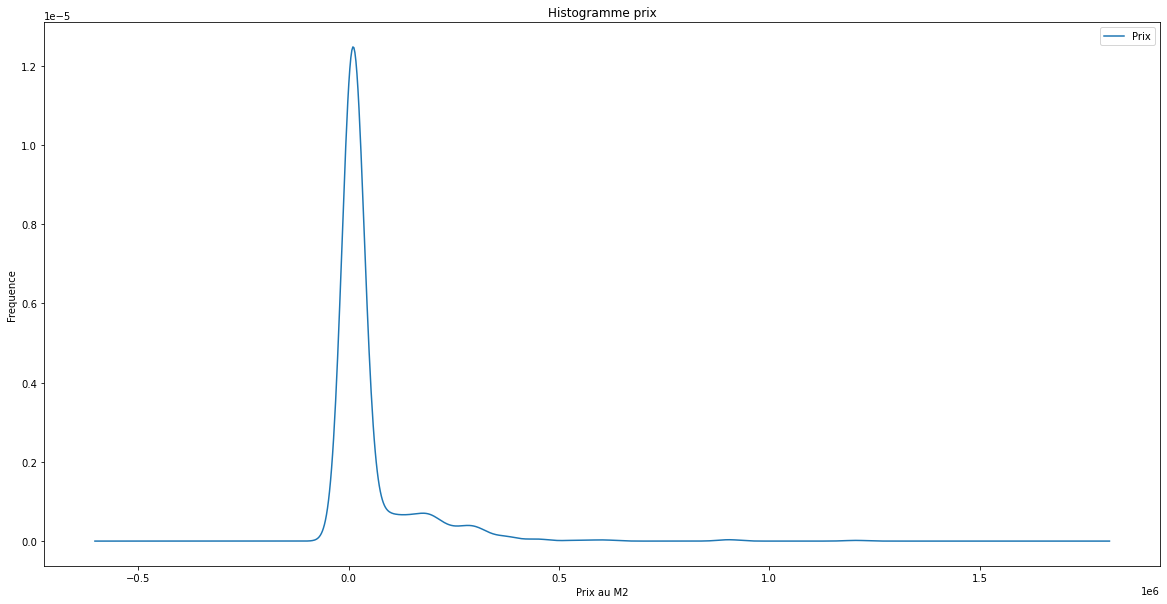

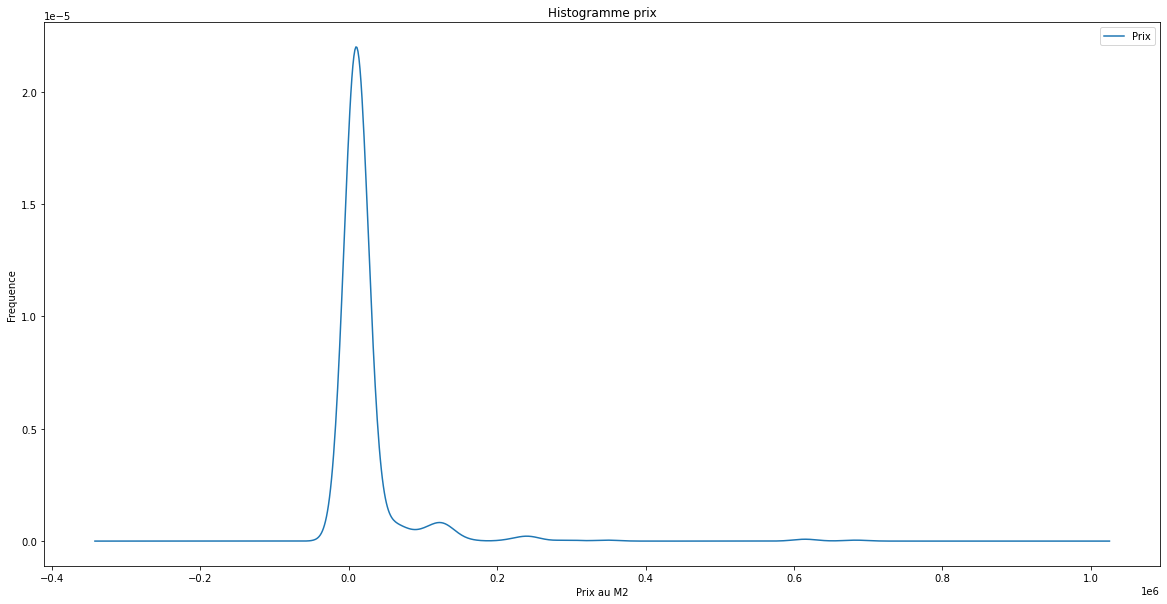

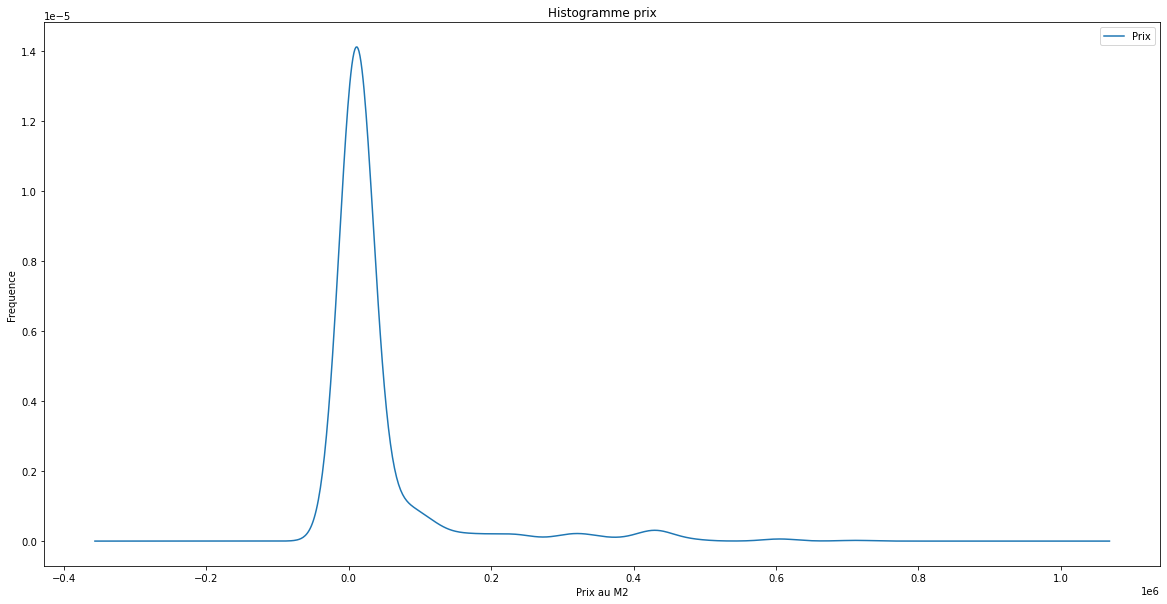

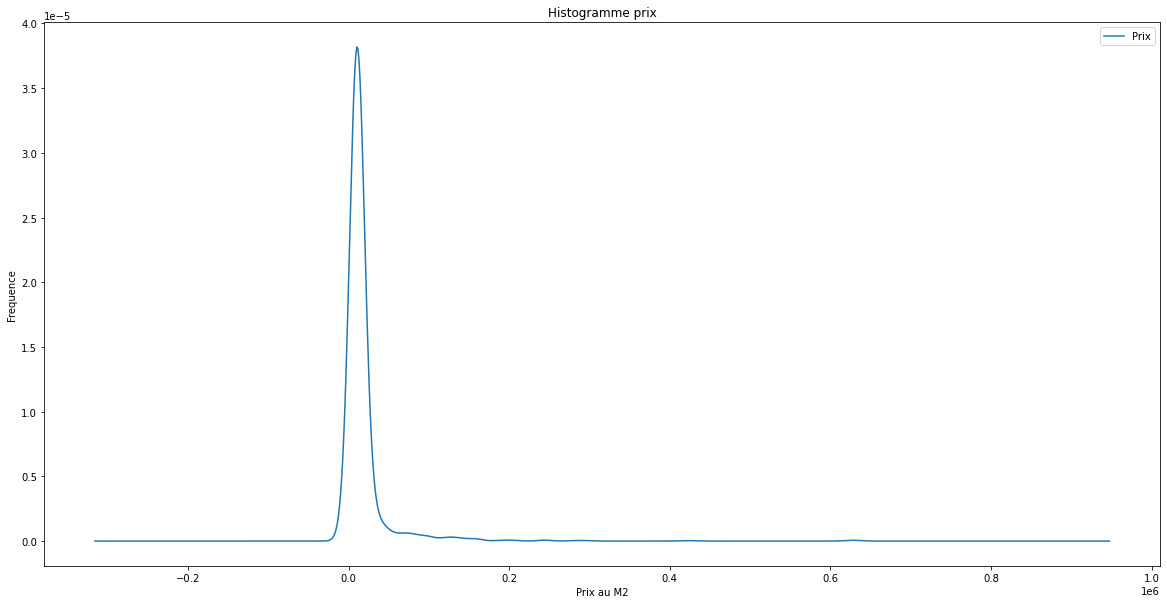

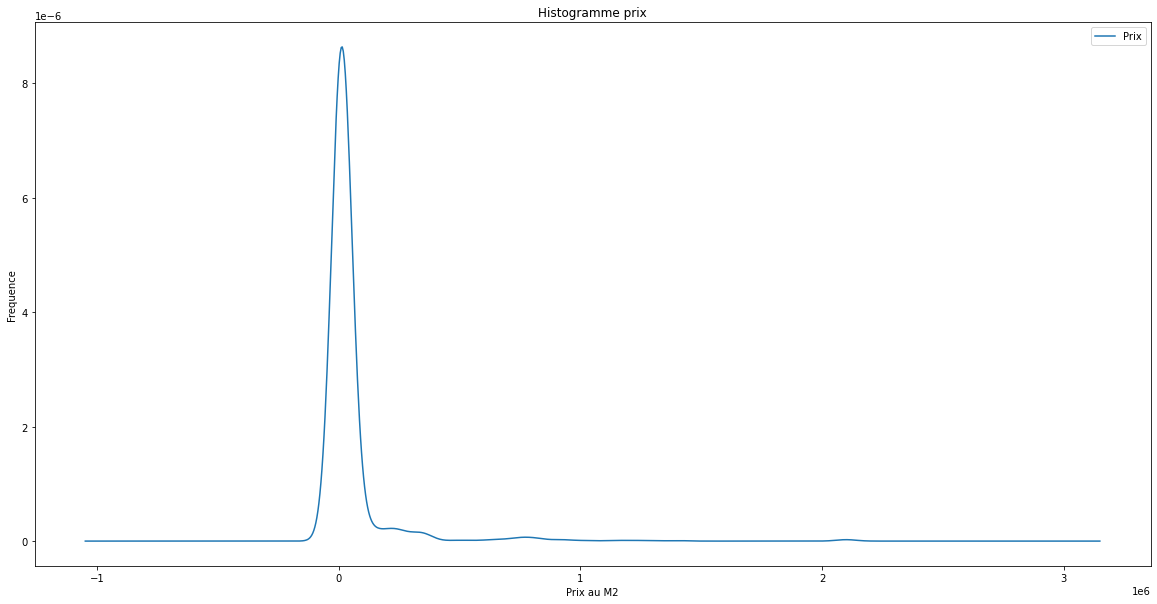

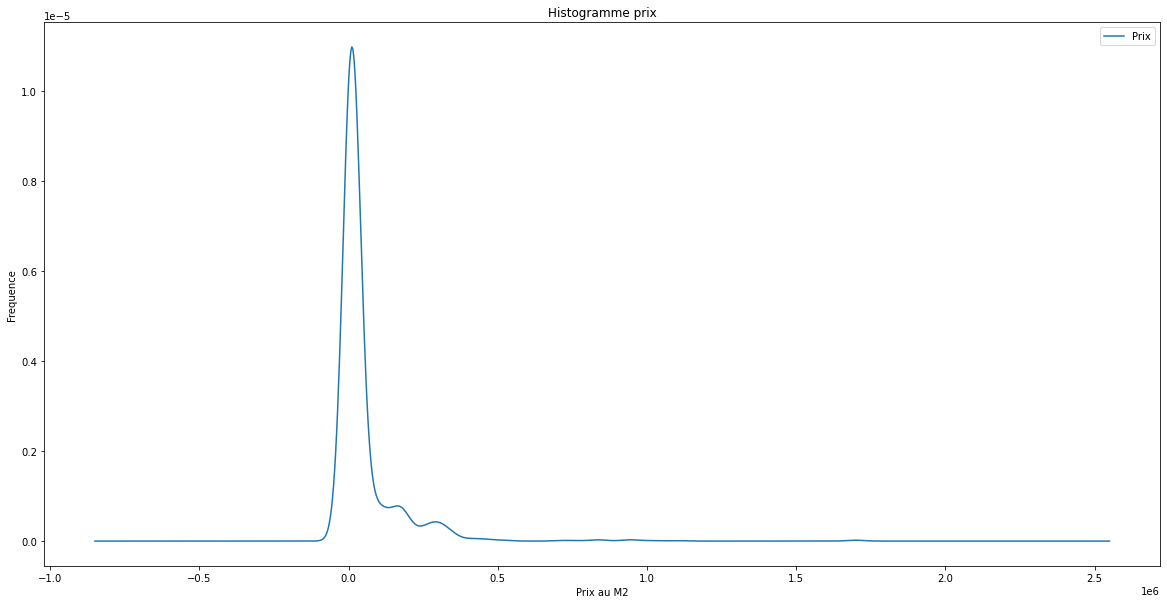

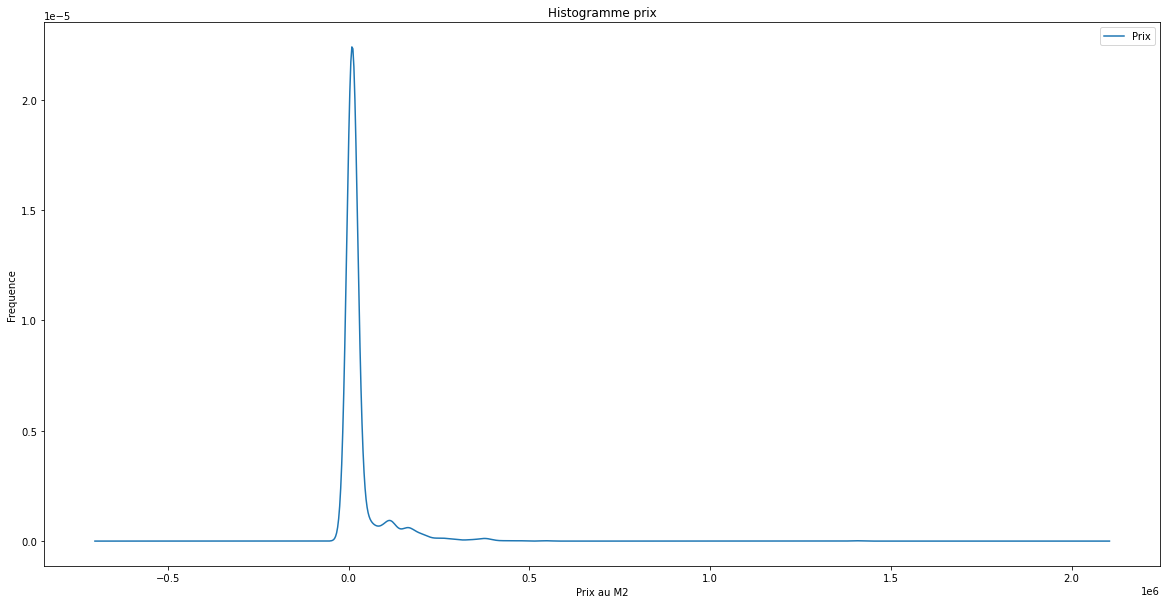

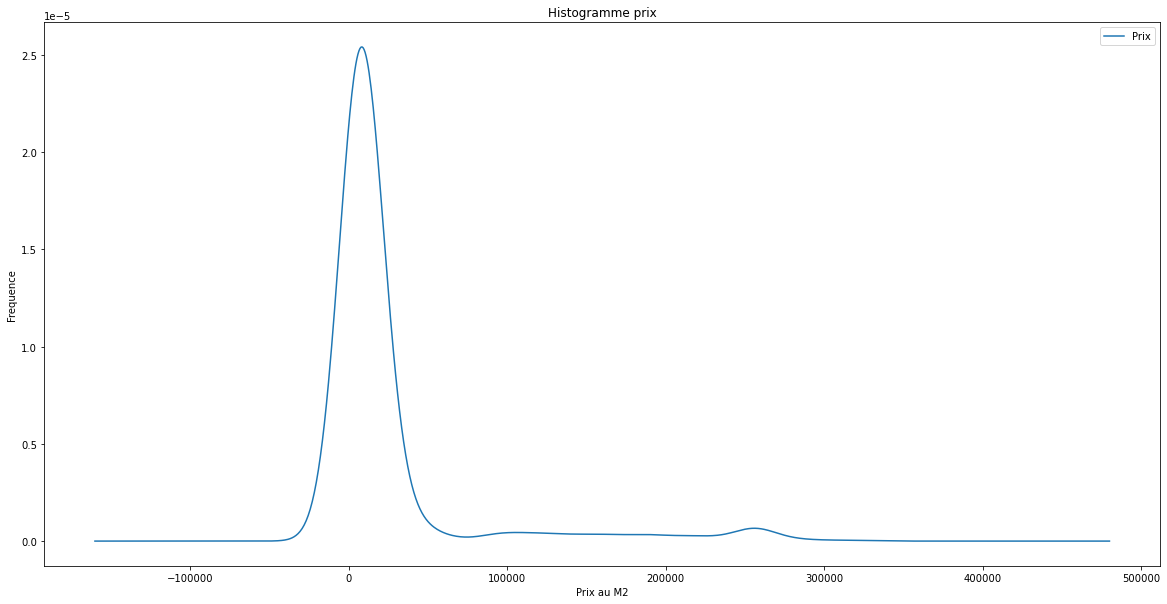

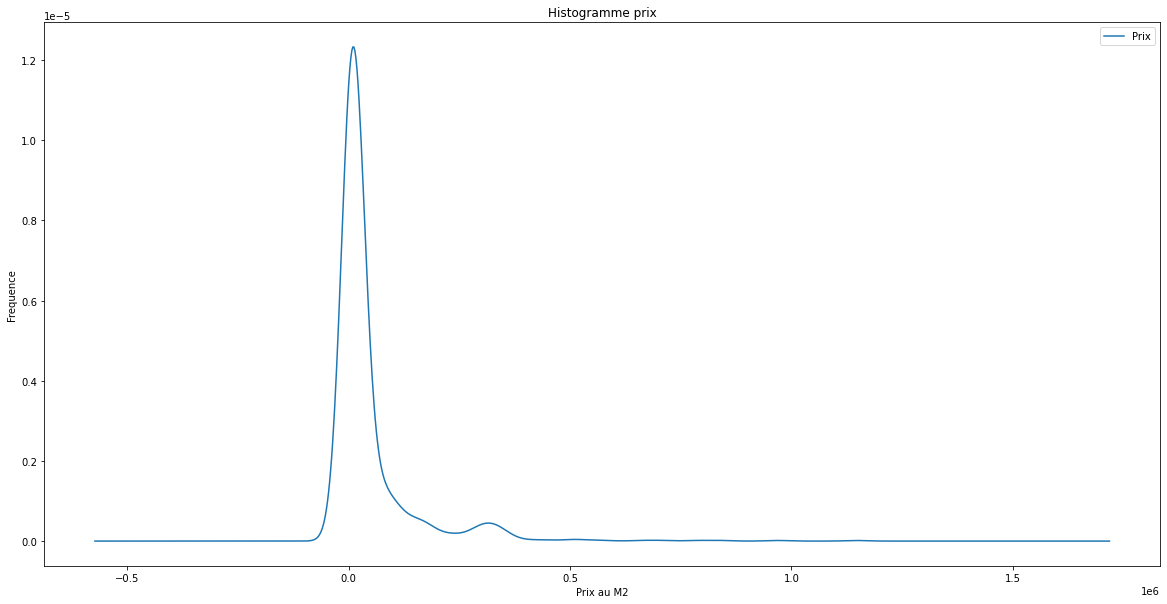

In [157]:

for com in df_joint["commune"].unique():
    plt.figure(figsize=(20,10))
    df_joint[df_joint["commune"]==com]["Prix"].plot(kind="density")
    plt.title("Histogramme prix")
    plt.xlabel("Prix au M2")
    plt.ylabel("Frequence")
    plt.legend()
    plt.show()

### Indicateur pour les valeurs de prix sortant de la normale
La loi choisie est la suivante
Prix < Q1 - 1.5*(Q3-Q1)  ou  x > Q3 + 1.5*(Q3-Q1)
où Q1 et Q3 sont respectivement les 1ers et 3e quartiles des distributions

In [158]:
df_joint["Outlier"]=False

In [169]:
def Outlier(df_func):
    Modifs=[]
    data=df_func.groupby(["commune"])["Prix"].describe()
    for com in df_func["commune"].unique():
        Q1= data["25%"][com]
        
        Q2= data["50%"][com]
        
        Q3= data["75%"][com]
        
        dg=df_func[df_func["commune"]==com]["Prix"].map(lambda x: ((x < (Q1 - 1.5*(Q3-Q1)) ) | (x > (Q3 + 1.5*(Q3-Q1)) ) ))
        
        Modifs.append(dg)
    return Modifs
            

In [160]:
data=df_joint.groupby(["commune"])["Prix"].describe()
com="75101"
Q1= data["25%"][com]
print(Q1)
Q2= data["50%"][com]
print(Q2)
Q3= data["75%"][com]
print(Q3)
dg=df_joint[df_joint["commune"]==com]["Prix"].map(lambda x: True if ((x < (Q1 - 1.5*(Q3-Q1)) ) | (x > (Q3 + 1.5*(Q3-Q1)) ) ) else False)

11077.235772357724
14774.953007518798
82727.27272727274


## Affectation des valeurs de l'indicateur outlier

In [174]:
Outlier(df_joint)[0].index

Index(['75101000AK18', '75101000AL10', '75101000AL27', '75101000AL28',
       '75101000AL3', '75101000AL33', '75101000AL9', '75101000AN17',
       '75101000AN31', '75101000AN72',
       ...
       '75101000BC77', '75101000BD21', '75101000BD21', '75101000BD31',
       '75101000BD34', '75101000BD49', '75101000BD5', '75101000BD5',
       '75101000BD6', '75101000BD7'],
      dtype='object', name='jointure', length=272)

In [175]:
df_joint_outlier=df_joint
i=0

Communes=df_joint_outlier["commune"].unique()

for outlier in Outlier(df_joint):
    for out in outlier.index:
        df_joint_outlier.loc[out, "Outlier"]= outlier[out]
        
df_joint_outlier["Outlier"].unique()

array([False,  True])

In [176]:
df_joint_Outlier["Outlier"].unique()

array([False,  True])

### SUppression des colonnes inutiles (Trop de Nan)

In [185]:
df_joint_clean=df_joint_Outlier[df_joint_Outlier["Outlier"]==False]

In [186]:
column_to_remove=(df_joint_clean.isna().sum()/df_joint_clean.shape[0])[(df_joint_clean.isna().sum()/df_joint_clean.shape[0])>0.90].index

In [245]:
df_joint_clean=df_joint_Outlier[df_joint_Outlier["Outlier"]==False].drop(["Code service CH" ,"Reference document" ,"1 Articles CGI" ,"2 Articles CGI" ,"3 Articles CGI" ,"4 Articles CGI" ,"5 Articles CGI","Identifiant local"], axis=1)
df_joint_clean

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Prefixe de section,Section,No plan,No Volume,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,Arrondissement,id,commune,prefixe,section,numero,contenance,created,updated,coords,Outlier,Prix
jointure,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
75101000AK18,1,28/09/2020,Vente,100.0,28.0,NaN,QUAI,5824,DU LOUVRE,75001,PARIS 01,75,101,000,AK,18,NaN,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,110.0,2.0,nan,NaN,NaN,75101,75101000AK0018,75101,000,AK,18,224.0,2006-10-09,2016-07-21,"[(651622.7919587007, 6862327.400295994), (6516...",False,0.909091
75101000AL10,1,23/12/2020,Vente,1220000.0,12.0,NaN,PL,2594,DAUPHINE,75001,PARIS 01,75,101,000,AL,10,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,51.0,3.0,nan,NaN,NaN,75101,75101000AL0010,75101,000,AL,10,256.0,2006-10-09,2016-07-21,"[(651791.2734951854, 6862074.719433691), (6517...",False,23921.568627
75101000AL27,1,14/09/2020,Vente,1250000.0,23.0,NaN,PL,2594,DAUPHINE,75001,PARIS 01,75,101,000,AL,27,NaN,1,"62,50",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,62.0,4.0,nan,NaN,NaN,75101,75101000AL0027,75101,000,AL,27,147.0,2006-10-09,2016-07-21,"[(651703.3420849448, 6862045.939602381), (6517...",False,20161.290323
75101000AL28,1,26/08/2020,Vente,1200000.0,68.0,NaN,QUAI,6920,DES ORFEVRES,75001,PARIS 01,75,101,000,AL,28,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,40.0,1.0,nan,NaN,NaN,75101,75101000AL0028,75101,000,AL,28,61.0,2006-10-09,2016-07-21,"[(651693.7920108116, 6862048.120881027), (6516...",False,30000.000000
75101000AL3,1,15/06/2020,Vente,3100000.0,24.0,NaN,PL,2594,DAUPHINE,75001,PARIS 01,75,101,000,AL,3,NaN,27,"51,00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,52.0,2.0,nan,NaN,NaN,75101,75101000AL0003,75101,000,AL,3,324.0,2006-10-09,2016-07-21,"[(651720.5072086777, 6862089.375383045), (6517...",False,59615.384615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75120000EC22,1,20/10/2020,Vente,834250.0,11.0,NaN,BD,2608,DAVOUT,75020,PARIS 20,75,120,000,EC,22,NaN,85,"92,75",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,94.0,5.0,nan,NaN,NaN,75120,75120000EC0022,75120,000,EC,22,2927.0,2007-09-28,2014-11-04,"[(656703.2464831937, 6861090.670229163), (6567...",False,8875.000000
75120000EC25,1,14/01/2020,Vente,250000.0,19.0,NaN,BD,2608,DAVOUT,75020,PARIS 20,75,120,000,EC,25,NaN,28,"28,52",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,28.0,1.0,nan,NaN,NaN,75120,75120000EC0025,75120,000,EC,25,681.0,2007-09-28,2014-11-04,"[(656756.5509782564, 6861110.776964385), (6567...",False,8928.571429
75120000EC27,1,20/11/2020,Vente,320800.0,25.0,NaN,BD,2608,DAVOUT,75020,PARIS 20,75,120,000,EC,27,NaN,11,"38,39",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,33.0,2.0,nan,NaN,NaN,75120,75120000EC0027,75120,000,EC,27,138.0,2007-09-28,2014-11-04,"[(656772.9612026982, 6861158.113540209), (6567...",False,9721.212121


In [246]:
df_joint_clean.isna().describe()

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Prefixe de section,Section,No plan,No Volume,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,Arrondissement,id,commune,prefixe,section,numero,contenance,created,updated,coords,Outlier,Prix
count,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419
unique,1,1,1,1,1,2,2,1,1,1,1,1,1,1,1,1,1,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,True,True,True,True,True,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False
freq,13419,13419,13419,13419,13419,12898,13408,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,12823,9740,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,12823,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419,13419


In [247]:
df_joint_clean["adresse"]=df_joint_clean["No voie"].map(str)+df_joint_clean["Type de voie"].map(str)+df_joint_clean["Voie"].map(str)+df_joint_clean["Arrondissement"].map(str)

In [248]:
df_joint_clean.groupby(["adresse"])["Prix"].describe()

,count,mean,std,min,25%,50%,75%,max
adresse,,,,,,,,
1.0AVALPHONSE XIII75116,1.0,8600.000000,NaN,8600.000000,8600.000000,8600.000000,8600.000000,8600.000000
1.0AVDE LOWENDAL75107,2.0,15595.238095,3198.816391,13333.333333,14464.285714,15595.238095,16726.190476,17857.142857
1.0AVDE PETERHOF75117,1.0,9051.111111,NaN,9051.111111,9051.111111,9051.111111,9051.111111,9051.111111
1.0AVGAMBETTA75120,2.0,10780.797101,279.255939,10583.333333,10682.065217,10780.797101,10879.528986,10978.260870
1.0AVJEAN MOULIN75114,1.0,11636.363636,NaN,11636.363636,11636.363636,11636.363636,11636.363636,11636.363636
...,...,...,...,...,...,...,...,...
99.0RUELEGENDRE75117,1.0,9578.571429,NaN,9578.571429,9578.571429,9578.571429,9578.571429,9578.571429
99.0RUEOBERKAMPF75111,1.0,10526.315789,NaN,10526.315789,10526.315789,10526.315789,10526.315789,10526.315789
99.0RUEORDENER75118,1.0,10870.967742,NaN,10870.967742,10870.967742,10870.967742,10870.967742,10870.967742


In [249]:
df_joint_clean.groupby(["adresse"])["Prix"].describe()["std"].isna().describe()

count     8869
unique       2
top       True
freq      6323
Name: std, dtype: object

## Seuil de prix
cutoff_price représente un plafond arbitraire

## Observation
Le prix des appartements par adresse est quasiment le même et varie très peu en fonction du No plan et de la section
Les prix de certains arrondissements sont fortement différents de la réalité qui est en moyenne en dessous de 50000 sur des sites immobiliers

In [253]:
df_joint_clean

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Prefixe de section,Section,No plan,No Volume,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,Arrondissement,id,commune,prefixe,section,numero,contenance,created,updated,coords,Outlier,Prix,adresse
jointure,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
75101000AK18,1,28/09/2020,Vente,100.0,28.0,NaN,QUAI,5824,DU LOUVRE,75001,PARIS 01,75,101,000,AK,18,NaN,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,110.0,2.0,nan,NaN,NaN,75101,75101000AK0018,75101,000,AK,18,224.0,2006-10-09,2016-07-21,"[(651622.7919587007, 6862327.400295994), (6516...",False,0.909091,28.0QUAIDU LOUVRE75101
75101000AL10,1,23/12/2020,Vente,1220000.0,12.0,NaN,PL,2594,DAUPHINE,75001,PARIS 01,75,101,000,AL,10,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,51.0,3.0,nan,NaN,NaN,75101,75101000AL0010,75101,000,AL,10,256.0,2006-10-09,2016-07-21,"[(651791.2734951854, 6862074.719433691), (6517...",False,23921.568627,12.0PLDAUPHINE75101
75101000AL27,1,14/09/2020,Vente,1250000.0,23.0,NaN,PL,2594,DAUPHINE,75001,PARIS 01,75,101,000,AL,27,NaN,1,"62,50",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,62.0,4.0,nan,NaN,NaN,75101,75101000AL0027,75101,000,AL,27,147.0,2006-10-09,2016-07-21,"[(651703.3420849448, 6862045.939602381), (6517...",False,20161.290323,23.0PLDAUPHINE75101
75101000AL28,1,26/08/2020,Vente,1200000.0,68.0,NaN,QUAI,6920,DES ORFEVRES,75001,PARIS 01,75,101,000,AL,28,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,40.0,1.0,nan,NaN,NaN,75101,75101000AL0028,75101,000,AL,28,61.0,2006-10-09,2016-07-21,"[(651693.7920108116, 6862048.120881027), (6516...",False,30000.000000,68.0QUAIDES ORFEVRES75101
75101000AL33,1,02/11/2020,Vente,1035000.0,29.0,NaN,PL,2594,DAUPHINE,75001,PARIS 01,75,101,000,AL,33,NaN,12,"43,71",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,50.0,1.0,nan,NaN,NaN,75101,75101000AL0033,75101,000,AL,33,104.0,2006-10-09,2016-07-21,"[(651682.04332129, 6862064.698528506), (651688...",False,20700.000000,29.0PLDAUPHINE75101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75120000EC22,1,20/10/2020,Vente,834250.0,11.0,NaN,BD,2608,DAVOUT,75020,PARIS 20,75,120,000,EC,22,NaN,85,"92,75",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,94.0,5.0,nan,NaN,NaN,75120,75120000EC0022,75120,000,EC,22,2927.0,2007-09-28,2014-11-04,"[(656703.2464831937, 6861090.670229163), (6567...",False,8875.000000,11.0BDDAVOUT75120
75120000EC25,1,14/01/2020,Vente,250000.0,19.0,NaN,BD,2608,DAVOUT,75020,PARIS 20,75,120,000,EC,25,NaN,28,"28,52",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,28.0,1.0,nan,NaN,NaN,75120,75120000EC0025,75120,000,EC,25,681.0,2007-09-28,2014-11-04,"[(656756.5509782564, 6861110.776964385), (6567...",False,8928.571429,19.0BDDAVOUT75120
75120000EC27,1,20/11/2020,Vente,320800.0,25.0,NaN,BD,2608,DAVOUT,75020,PARIS 20,75,120,000,EC,27,NaN,11,"38,39",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,33.0,2.0,nan,NaN,NaN,75120,75120000EC0027,75120,000,EC,27,138.0,2007-09-28,2014-11-04,"[(656772.9612026982, 6861158.113540209), (6567...",False,9721.212121,25.0BDDAVOUT75120


In [250]:
cutoff_price=50000

In [251]:
df_joint_clean=df_joint_clean[df_joint_clean["Prix"] < cutoff_price]

(0.024390243902439025, 1145454.5454545454)


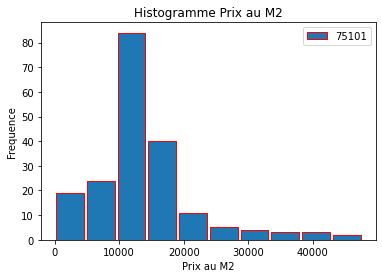

(0.024390243902439025, 1145454.5454545454)


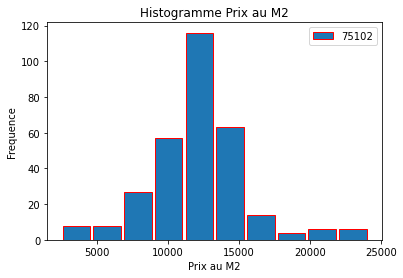

(0.024390243902439025, 1145454.5454545454)


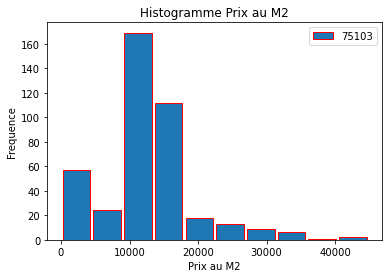

(0.024390243902439025, 1145454.5454545454)


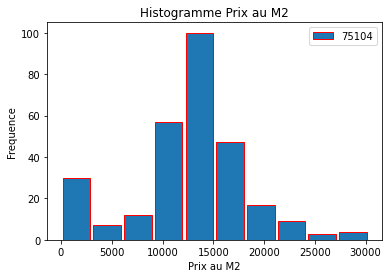

(0.024390243902439025, 1145454.5454545454)


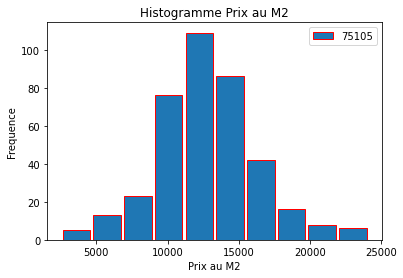

(0.024390243902439025, 1145454.5454545454)


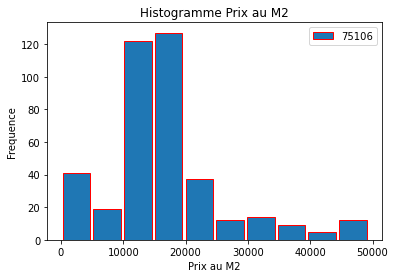

(0.024390243902439025, 1145454.5454545454)


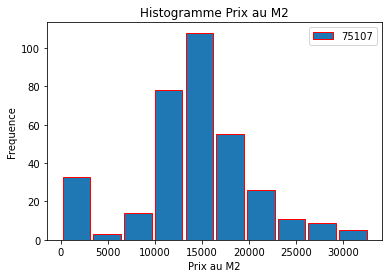

(0.024390243902439025, 1145454.5454545454)


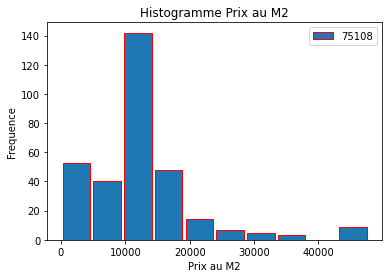

(0.024390243902439025, 1145454.5454545454)


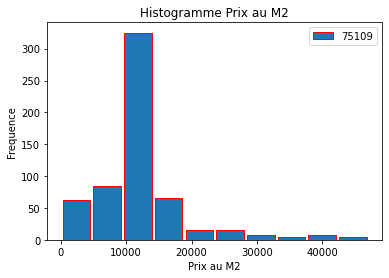

(0.024390243902439025, 1145454.5454545454)


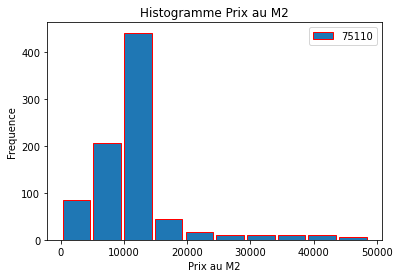

(0.024390243902439025, 1145454.5454545454)


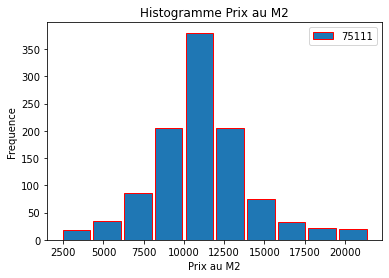

(0.024390243902439025, 1145454.5454545454)


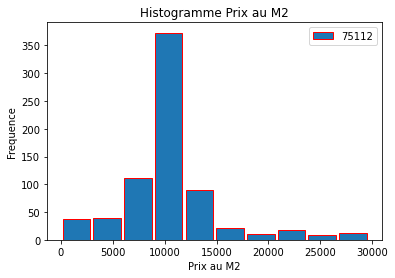

(0.024390243902439025, 1145454.5454545454)


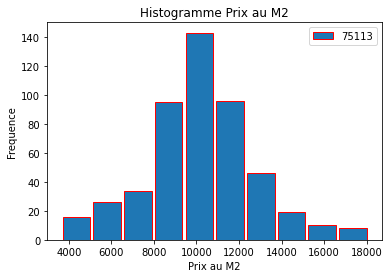

(0.024390243902439025, 1145454.5454545454)


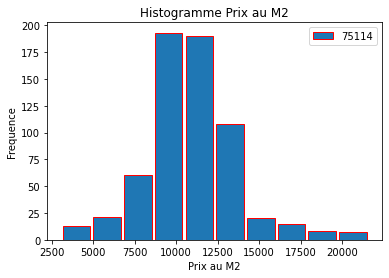

(0.024390243902439025, 1145454.5454545454)


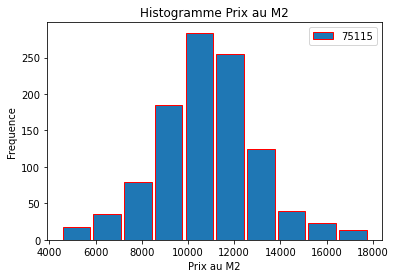

(0.024390243902439025, 1145454.5454545454)


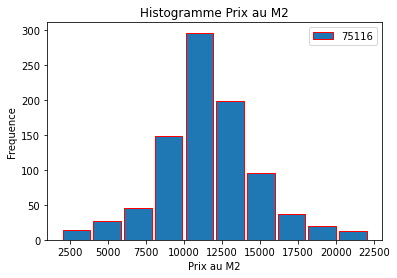

(0.024390243902439025, 1145454.5454545454)


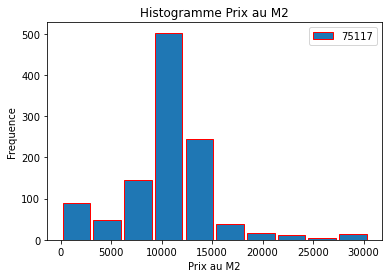

(0.024390243902439025, 1145454.5454545454)


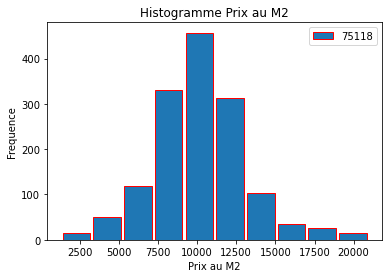

(0.024390243902439025, 1145454.5454545454)


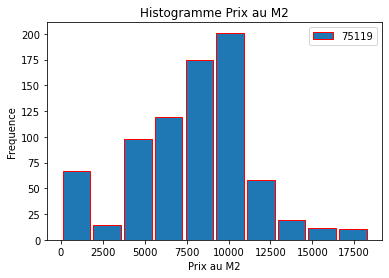

(0.024390243902439025, 1145454.5454545454)


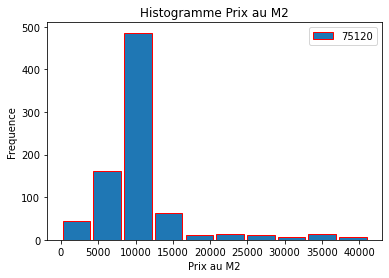

In [252]:
for com in df_joint_clean["commune"].unique():
    
    #range_hist=(df_joint_clean[df_joint["commune"]==com]["Prix"].min(),df_joint_clean[df_joint_clean["commune"]==com]["Prix"].max())
    print(range_hist)
    plt.hist(df_joint_clean[df_joint_clean["commune"]==com]["Prix"].values,rwidth=0.9,edgecolor="red", label=com)
    plt.title("Histogramme Prix au M2")
    plt.xlabel("Prix au M2")
    plt.ylabel("Frequence")
    plt.legend()
    plt.show()

In [254]:


Communes=df_joint_clean["commune"].unique()

for outlier in Outlier(df_joint_clean):
    for out in outlier.index:
        df_joint_clean.loc[out, "Outlier"]= outlier[out]
        
df_joint_clean["Outlier"].unique()

C:\Users\SD.HEUNAMBIAFENG\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\SD.HEUNAMBIAFENG\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


array([ True, False])

In [288]:
df_joint_clean_2=df_joint_clean[df_joint_clean["Outlier"]==False]

In [289]:
df_joint_clean_2

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Prefixe de section,Section,No plan,No Volume,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,Arrondissement,id,commune,prefixe,section,numero,contenance,created,updated,coords,Outlier,Prix,adresse
jointure,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
75101000AL27,1,14/09/2020,Vente,1250000.0,23.0,NaN,PL,2594,DAUPHINE,75001,PARIS 01,75,101,000,AL,27,NaN,1,"62,50",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,62.0,4.0,nan,NaN,NaN,75101,75101000AL0027,75101,000,AL,27,147.0,2006-10-09,2016-07-21,"[(651703.3420849448, 6862045.939602381), (6517...",False,20161.290323,23.0PLDAUPHINE75101
75101000AL33,1,02/11/2020,Vente,1035000.0,29.0,NaN,PL,2594,DAUPHINE,75001,PARIS 01,75,101,000,AL,33,NaN,12,"43,71",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,50.0,1.0,nan,NaN,NaN,75101,75101000AL0033,75101,000,AL,33,104.0,2006-10-09,2016-07-21,"[(651682.04332129, 6862064.698528506), (651688...",False,20700.000000,29.0PLDAUPHINE75101
75101000AN17,1,07/07/2020,Vente,950000.0,57.0,NaN,RUE,8249,DE RIVOLI,75001,PARIS 01,75,101,000,AN,17,NaN,14,"117,44",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,118.0,4.0,nan,NaN,NaN,75101,75101000AN0017,75101,000,AN,17,244.0,2006-10-09,2016-07-21,"[(651995.4272487668, 6862314.715204408), (6520...",False,8050.847458,57.0RUEDE RIVOLI75101
75101000AN31,1,08/10/2020,Vente,300000.0,9.0,NaN,RUE,6921,DES ORFEVRES,75001,PARIS 01,75,101,000,AN,31,NaN,2,"28,53",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,27.0,1.0,nan,NaN,NaN,75101,75101000AN0031,75101,000,AN,31,111.0,2006-10-09,2016-07-21,"[(651951.8004664086, 6862258.176310841), (6519...",False,11111.111111,9.0RUEDES ORFEVRES75101
75101000AN72,1,23/12/2020,Vente,770000.0,7.0,NaN,BD,8894,DE SEBASTOPOL,75001,PARIS 01,75,101,000,AN,72,NaN,17,"52,63",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,59.0,2.0,nan,NaN,NaN,75101,75101000AN0072,75101,000,AN,72,308.0,2006-10-09,2016-07-21,"[(652153.6787700533, 6862250.889965726), (6521...",False,13050.847458,7.0BDDE SEBASTOPOL75101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75120000EC22,1,20/10/2020,Vente,834250.0,11.0,NaN,BD,2608,DAVOUT,75020,PARIS 20,75,120,000,EC,22,NaN,85,"92,75",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,94.0,5.0,nan,NaN,NaN,75120,75120000EC0022,75120,000,EC,22,2927.0,2007-09-28,2014-11-04,"[(656703.2464831937, 6861090.670229163), (6567...",False,8875.000000,11.0BDDAVOUT75120
75120000EC25,1,14/01/2020,Vente,250000.0,19.0,NaN,BD,2608,DAVOUT,75020,PARIS 20,75,120,000,EC,25,NaN,28,"28,52",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,28.0,1.0,nan,NaN,NaN,75120,75120000EC0025,75120,000,EC,25,681.0,2007-09-28,2014-11-04,"[(656756.5509782564, 6861110.776964385), (6567...",False,8928.571429,19.0BDDAVOUT75120
75120000EC27,1,20/11/2020,Vente,320800.0,25.0,NaN,BD,2608,DAVOUT,75020,PARIS 20,75,120,000,EC,27,NaN,11,"38,39",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,33.0,2.0,nan,NaN,NaN,75120,75120000EC0027,75120,000,EC,27,138.0,2007-09-28,2014-11-04,"[(656772.9612026982, 6861158.113540209), (6567...",False,9721.212121,25.0BDDAVOUT75120


## Traitement des coordonnées geospatiales
Etant donné qu'on a plusieurs points pour définir un même appartement, on va procéder à une recherche de centroid pour chaque lieu. Le centroid sera le centre de gravité

In [290]:
import numpy as np

In [264]:
test=df_joint_clean["coords"][0]

In [279]:
type(test)

list

In [285]:
test

[(651622.7919587007, 6862327.400295994),
 (651627.2972892058, 6862325.672448667),
 (651630.2522420731, 6862324.558024583),
 (651633.2073817302, 6862323.465840296),
 (651632.836650791, 6862321.244952626),
 (651632.246933512, 6862318.28085909),
 (651631.6531251771, 6862316.584469983),
 (651631.4490909629, 6862315.874499003),
 (651627.9825396554, 6862305.806561318),
 (651616.3885602349, 6862309.194872728),
 (651619.9593302697, 6862319.439852185),
 (651622.7919587007, 6862327.400295994)]

In [284]:
np.mean([test[i][0] for i in range(0,len(test)) ])

651627.4047550845

In [281]:
[np.mean([test[i][0] for i in range(0,len(test)) ]),np.mean([test[i][1] for i in range(0,len(test))])]

[651627.4047550845, 6862319.576914371]

In [291]:
df_final=df_joint_clean_2

## On ressort le centroid des coordonnées des habitations

In [292]:
df_final["coords"]=df_final["coords"].map(lambda x: [np.mean([x[i][0] for i in range(0,len(x)) ]),np.mean([x[i][1] for i in range(0,len(x))])])

<ipython-input-292-b5d3d17bdd3d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["coords"]=df_final["coords"].map(lambda x: [np.mean([x[i][0] for i in range(0,len(x)) ]),np.mean([x[i][1] for i in range(0,len(x))])])


In [293]:
df_final["coords"]

jointure
75101000AL27    [651706.8328554494, 6862044.072548121]
75101000AL33    [651688.9965931154, 6862066.346058488]
75101000AN17    [652003.8715175325, 6862316.373279403]
75101000AN31    [651955.9218848009, 6862261.051503268]
75101000AN72    [652144.5212970254, 6862242.921886223]
                                 ...                  
75120000EC22    [656735.9348770241, 6861073.609196711]
75120000EC25    [656768.3537734457, 6861121.042963294]
75120000EC27    [656777.6843338875, 6861150.603281722]
75120000EC28    [656765.6514292042, 6861147.945001082]
75120000EC28    [656765.6514292042, 6861147.945001082]
Name: coords, Length: 11821, dtype: object

In [294]:
df_final["coords_X"]=df_final["coords"].map(lambda x: x[0])
df_final["coords_Y"]=df_final["coords"].map(lambda x: x[1])

<ipython-input-294-4b7f90edc96a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["coords_X"]=df_final["coords"].map(lambda x: x[0])
<ipython-input-294-4b7f90edc96a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["coords_Y"]=df_final["coords"].map(lambda x: x[1])


In [295]:
df_final["coords_X"]

jointure
75101000AL27    651706.832855
75101000AL33    651688.996593
75101000AN17    652003.871518
75101000AN31    651955.921885
75101000AN72    652144.521297
                    ...      
75120000EC22    656735.934877
75120000EC25    656768.353773
75120000EC27    656777.684334
75120000EC28    656765.651429
75120000EC28    656765.651429
Name: coords_X, Length: 11821, dtype: float64

In [296]:
df_final["coords_Y"]

jointure
75101000AL27    6.862044e+06
75101000AL33    6.862066e+06
75101000AN17    6.862316e+06
75101000AN31    6.862261e+06
75101000AN72    6.862243e+06
                    ...     
75120000EC22    6.861074e+06
75120000EC25    6.861121e+06
75120000EC27    6.861151e+06
75120000EC28    6.861148e+06
75120000EC28    6.861148e+06
Name: coords_Y, Length: 11821, dtype: float64

## Modélisation du KNN

In [305]:
from sklearn.neighbors import KNeighborsClassifier, BallTree, KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [299]:
X=df_final[["coords_X","coords_Y","Arrondissement","Prix"]]
Y=df_final["Arrondissement"]

In [300]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3, random_state=0, stratify=Y)

In [301]:
X_train["Arrondissement"].unique().size

20

In [302]:
X_test["Arrondissement"].unique().size

20

In [313]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    "n_neighbors": [50,60,80,100,120,150,200,250,350],
    "weights": ['uniform','distance'],
    "metric": ['euclidean','manhattan']
}
gs=GridSearchCV(KNeighborsRegressor(),
               grid_params,
               verbose=1,
               cv=3,
               n_jobs=-1)



In [314]:
gs_results= gs.fit(X_train[["coords_X","coords_Y"]], X_train["Prix"])

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [315]:
gs_results.best_params_

{'metric': 'euclidean', 'n_neighbors': 50, 'weights': 'uniform'}

In [321]:
knn_immo=KNeighborsRegressor(n_neighbors=50, metric="euclidean", weights="uniform")

In [322]:
knn_immo.fit(X_train[["coords_X","coords_Y"]], X_train["Prix"])

KNeighborsRegressor(metric='euclidean', n_neighbors=50)

In [327]:
knn_immo.predict(X_test[["coords_X","coords_Y"]])

array([12666.05765858,  4407.00201819, 11048.7864879 , ...,
       14741.88014342,  9894.2723294 , 10758.20354281])

In [328]:
knn_immo.score(X_test[["coords_X","coords_Y"]], X_test["Prix"])

0.28916939999634217

In [332]:
knn_immo.radius